In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

df_anno = pd.read_feather("./NHP_BG_AIT_115/204_341/anno.feather")   # Has subclass colors
#df_anno = pd.read_csv("./NHP_BG_AIT_115/204_337/NHP_BG_204_337_AIT115_ann_map_QC_full.csv")

In [2]:
df_anno.columns

Index(['sample_name_old', 'exp_component_name_id', 'exp_component_name_label',
       'exp_component_name_color', 'exp_component_vendor_name_id',
       'exp_component_vendor_name_label', 'exp_component_vendor_name_color',
       'batch_id', 'batch_label', 'batch_color',
       ...
       'contaminationType_label', 'contaminationType_color', 'contam_sum_id',
       'contam_sum_label', 'contam_sum_color', 'ar_id', 'reference_id',
       'cell_id', 'sample_id', 'cluster'],
      dtype='object', length=507)

In [3]:
df_ephys = pd.read_csv("NHPephys_features_090523.csv")
df_ephys.columns

Index(['cell_name', 'blowout_mv_qc', 'electrode_0_pa_qc', 'recording_date_qc',
       'seal_gohm_qc', 'input_resistance_mohm_qc',
       'initial_access_resistance_mohm_qc', 'input_access_resistance_ratio_qc',
       'fail_tags_qc', 'failed_blowout',
       ...
       'first_isi_inv_hero', 'peak_ratio_chirp', 'peak_freq_chirp',
       '3db_freq_chirp', 'peak_impedance_chirp', 'low_freq_impedance_chirp',
       'sync_freq_chirp', 'phase_peak_chirp', 'phase_low_chirp',
       'total_inductive_phase_chirp'],
      dtype='object', length=111)

In [4]:
df_ephys['recording_date_qc'].sort_values()

624     2019-10-10 23:56:30
1258    2019-10-22 21:16:40
784     2019-10-22 21:51:42
359     2019-10-22 22:54:15
476     2019-10-22 23:43:19
               ...         
600     2023-08-16 21:58:56
697     2023-08-16 22:16:10
985     2023-08-16 22:27:28
157     2023-08-16 23:01:08
957     2023-08-16 23:19:56
Name: recording_date_qc, Length: 1884, dtype: object

In [5]:
df_id = pd.read_csv("custom_report.csv")

In [6]:
print('Cultured: ', sum(df_id['project ']=='qIVSCC-METc'))
print('Acute: ', sum(df_id['project ']=='qIVSCC-METa'))

Cultured:  613
Acute:  1278


In [7]:
df2 = pd.merge(df_anno, df_id, how='inner', left_on='cell_name_label', right_on='cell_specimen_name ', sort=True)

len(df2)

1244

In [8]:
len(df_anno)

2206

In [9]:
len(df_id)

1891

In [10]:
df3 = pd.merge(df2, df_ephys, how='inner', left_on='cell_specimen_id ', right_on='cell_name', sort=True)
len(df3)

1241

In [11]:
df3_filt = df3[['STR' in roi for roi in df3['roi_label']]]
#inds1 = ifelse(grepl("STR|PALGPi|HYSTN",annoNew$roi), TRUE,FALSE)

df3_filt = df3_filt[df3_filt['percent_reads_aligned_total_label']>=25]    # was 50%
print(len(df3_filt))
df3_filt = df3_filt[df3_filt['Genes.Detected_label']>=1000]
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['score.Corr']>=0.55]
df3_filt = df3_filt[df3_filt['marker_sum_norm_label'] >= 0.6]
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['rna_amplification_pass_fail_label']=='Pass']
print(len(df3_filt))
# Layer labels have no numerics, no need to filter

874
748
606
606


<Figure size 1440x2880 with 0 Axes>

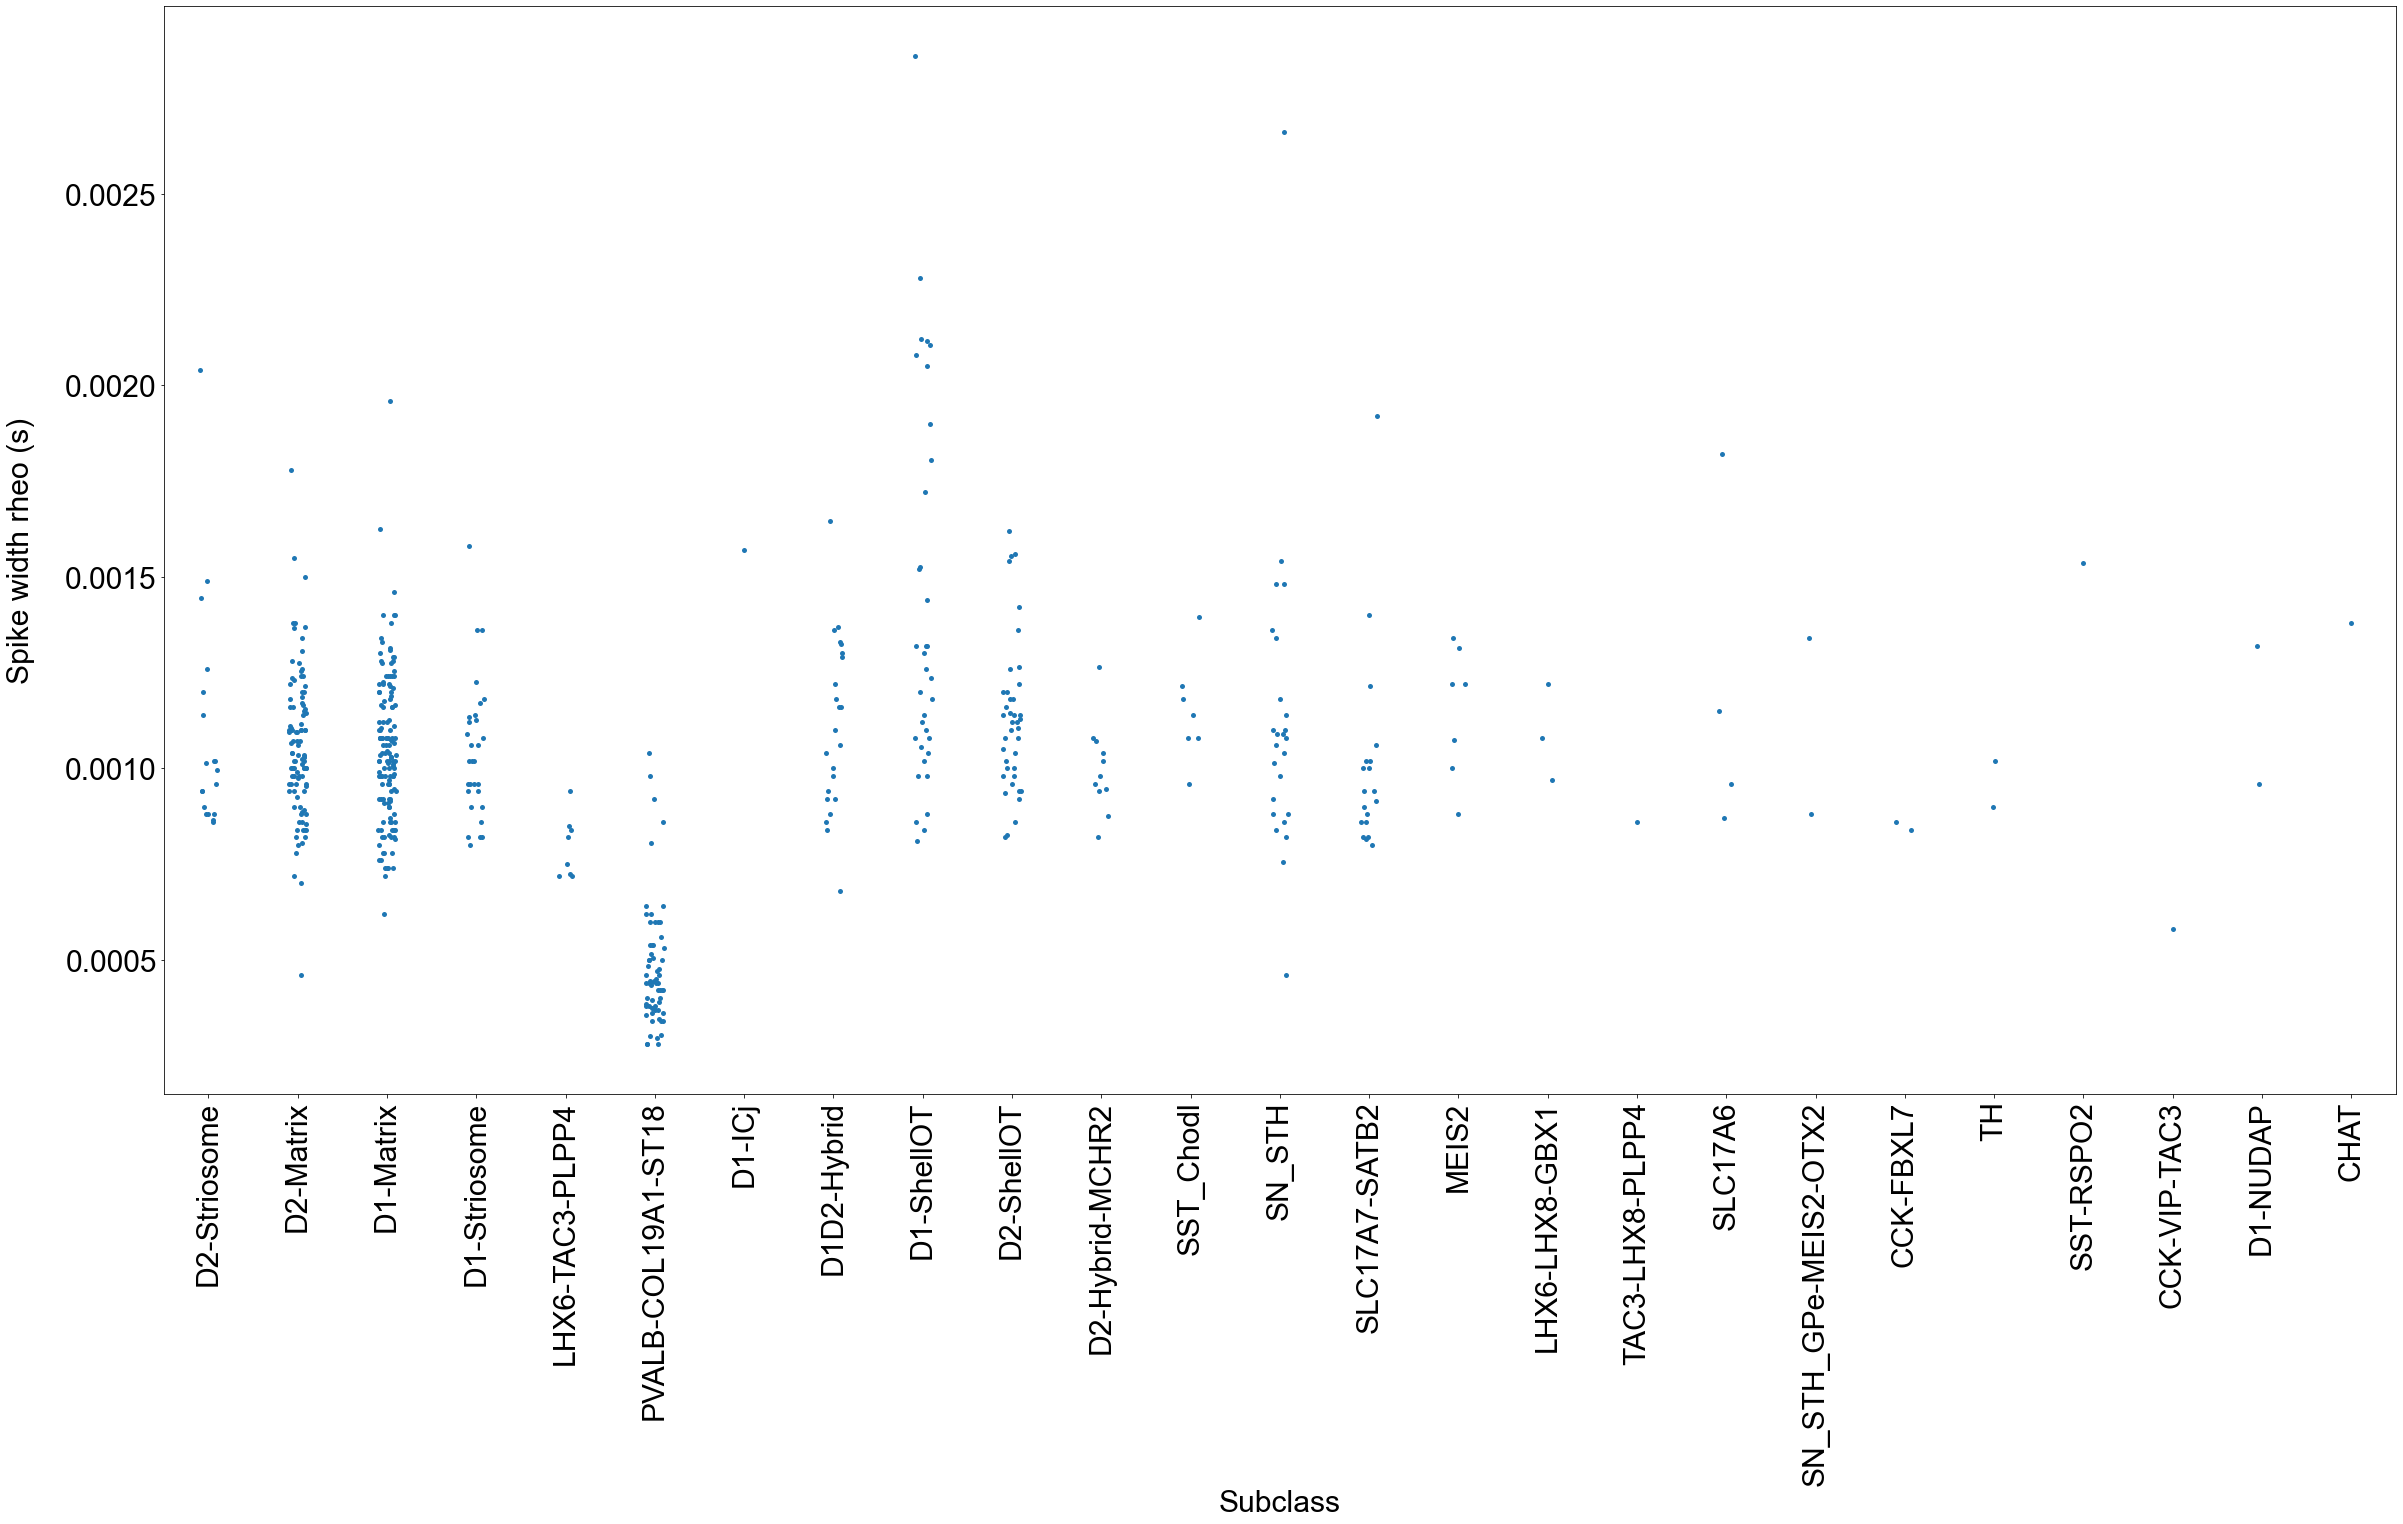

<Figure size 1440x2880 with 0 Axes>

In [12]:
fig, ax1 = plt.subplots(figsize=(40,20))
sns.set(rc={'figure.figsize':(20,40)})
sns.stripplot(data=df3_filt, x="level3.subclass_Tree_label", y="width_rheo", ax = ax1)
ax1.set_xlabel('Subclass', fontsize = 30)
ax1.set_ylabel('Spike width rheo (s)', labelpad=30, fontsize = 30)
#sns.catplot(data=df3, x="level3.subclass_Corr", y="fast_trough_v_rheo")
#sns.catplot(data=df3, x="level3.subclass_Corr", y="fast_trough_v_rheo")
#sns.catplot(data=df3, x="level3.subclass_Corr", y="latency_rheo")
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.figure(figsize=(20, 40))

In [13]:
main_subclasses = ['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                   'D1D2-Hybrid', 'D2-Hybrid-MCHR2', 'D1-NUDAP',
                   'SST_Chodl', 'PVALB-COL19A1-ST18', 'CHAT', 'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 
                   'CCK-VIP-TAC3', 'CCK-FBXL7']
df3_filt_sub = df3_filt[[sc in main_subclasses for sc in df3_filt['level3.subclass_Tree_label']]]
df3_filt_sub.reset_index(inplace=True, drop=True)   # Important to reset index for subsequent steps
df3_filt_sub

,sample_name_old,exp_component_name_id,exp_component_name_label,exp_component_name_color,exp_component_vendor_name_id,exp_component_vendor_name_label,exp_component_vendor_name_color,batch_id,batch_label,batch_color,...,first_isi_inv_hero,peak_ratio_chirp,peak_freq_chirp,3db_freq_chirp,peak_impedance_chirp,low_freq_impedance_chirp,sync_freq_chirp,phase_peak_chirp,phase_low_chirp,total_inductive_phase_chirp
0,None,2041,SM-J39WG_S281_E1-50,#FF73B2,2041,SM-J39WG-S281,#FF73B2,11,R8S4-191030,#CCA71F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,2026,SM-J39VK_S075_E1-50,#FF4DA4,2026,SM-J39VK-S075,#FF4DA4,12,R8S4-191120,#998500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,2027,SM-J39VK_S076_E1-50,#CC1F73,2027,SM-J39VK-S076,#CC1F73,12,R8S4-191120,#998500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,2028,SM-J39VK_S077_E1-50,#99004A,2028,SM-J39VK-S077,#99004A,12,R8S4-191120,#998500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,2029,SM-J39VK_S078_E1-50,#FF73B7,2029,SM-J39VK-S078,#FF73B7,12,R8S4-191120,#998500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,None,1451,AB-S40337_S671_E1-50,#1F28CC,1451,AB-S40337_S671_E1-50,#1F28CC,73,R8S4-230801,#FF739F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,None,1459,AB-S40340_S565_E1-50,#262EFF,1459,AB-S40340_S565_E1-50,#262EFF,75,R8S4-230822,#99172B,...,10.561893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,None,1465,AB-S40340_S571_E1-50,#7375FF,1465,AB-S40340_S571_E1-50,#7375FF,75,R8S4-230822,#99172B,...,6.033547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,None,1460,AB-S40340_S566_E1-50,#0006CC,1460,AB-S40340_S566_E1-50,#0006CC,75,R8S4-230822,#99172B,...,13.789300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(len(df3_filt_sub.columns))
print(len(df3_filt_sub.columns) - 92)
print(df3_filt_sub.columns.get_loc('upstroke_downstroke_ratio_ramp'))

686
594
594


In [15]:
df_ephys_sub = df3_filt_sub.iloc[:,594:686]
print(len(df_ephys_sub.columns))
df_ephys_sub.columns

92


Index(['upstroke_downstroke_ratio_ramp', 'threshold_v_ramp', 'width_ramp',
       'upstroke_ramp', 'downstroke_ramp', 'width_suprathresh_ramp',
       'trough_v_ramp', 'threshold_i_ramp', 'postap_slope_ramp',
       'fast_trough_deltav_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'threshold_v_short_square',
       'width_short_square', 'upstroke_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'peak_deltav_short_square', 'sag', 'sag_area', 'sag_tau', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'vm_for_sag', 'input_resistance',
       'input_resistance_ss', 'tau', 'latency_rheo', 'avg_rate_rheo',
       'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo', 'threshold_v_rheo',
       'peak_v_rheo', 'width_rheo', 'upstroke_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'postap_slope_rheo', 'fast_trough_v_last_rheo', 'adp_v_last_rheo',
       'adapt_hero', '

In [16]:
# Conservative outlier removal via std after transform
# Compare within each subclass and feature separately

from scipy.stats import skew
if 'PV' in df_ephys_sub.columns:
    df_ephys_sub = df_ephys_sub.drop(['PV'], axis=1)

keep = set(np.arange(len(df_ephys_sub)))
feat_outliers = []
df_ephys_sub_no_outliers = df_ephys_sub.copy()
df_ephys_trans = df3_filt_sub.copy()

for feat in df_ephys_sub.columns:  
    print(feat)
    sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
    if sk > 5:     # If very right skewed, log transform
        print('skewed')
        if any(df_ephys_sub[feat] == 0):
            #min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
            A = np.array(df_ephys_sub[feat][df_ephys_sub[feat]!=0])
            k = 3
            idx = np.argpartition(A, k)
            print("mins:", A[idx[:k]])
            print("mean:", np.nanmean(A))
            min_nonzero = np.mean(A[idx[:k]])
            print(min_nonzero)
            feat_vals = np.log(df_ephys_sub[feat]+min_nonzero)     # Careful creates a histogram bump at 0
        else:
            feat_vals = np.log(df_ephys_sub[feat])     
        # Be careful whether you want to add 0, but it's largely not counts, so not often zero?
    else:
        print('not_skewed')
        feat_vals = df_ephys_sub[feat]
        
    df_ephys_trans[feat] = feat_vals
    outlier_temp = np.empty(shape=(0))
    for subclass in main_subclasses:
        feat_vals_sub = feat_vals[df3_filt_sub['level3.subclass_Tree_label']==subclass]
        #Q1 = np.nanpercentile(feat_vals_sub, 25)
        #Q3 = np.nanpercentile(feat_vals_sub, 75)
        #IQR = Q3 - Q1
        feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)
        
        thresh = 3.5
        # Above Upper bound
        upper = thresh
        #upper=Q3+thresh*IQR
        nz_inds_upper = np.nonzero(np.array(feat_vals_z>upper) & np.array(df3_filt_sub['level3.subclass_Tree_label']==subclass))
         
        #Below Lower bound
        lower = -thresh
        #lower=Q1-thresh*IQR
        nz_inds_lower = np.nonzero(np.array(feat_vals_z<lower) & np.array(df3_filt_sub['level3.subclass_Tree_label']==subclass))
        
        #print('thresh:', thresh)
        print(subclass)
        print(upper)
        print(lower)
        print(len(nz_inds_upper[0]))
        print(len(nz_inds_lower[0]))
        print(np.count_nonzero(~np.isnan(feat_vals_sub)))
        #print(0.005 * len(feat_vals))
        #print('IQR:', IQR)
        
        if len(nz_inds_upper[0]) != 0:
            print("Severe high outlier(s) for feature ", feat)
            print(feat_vals.iloc[nz_inds_upper[0]])
            print(nz_inds_upper)
        if len(nz_inds_lower[0]) != 0:
            print("Severe low outlier(s) for feature ", feat)
            print(feat_vals.iloc[nz_inds_lower[0]])

        keep = keep.difference(set(nz_inds_upper[0]))
        keep = keep.difference(set(nz_inds_lower[0]))
        #outlier_temp = outlier_temp.append(nz_inds_upper[0])
        #outlier_temp = outlier_temp.append(nz_inds_lower[0])
        outlier_temp = np.hstack((outlier_temp,nz_inds_upper[0],nz_inds_lower[0]))
        #list(np.hstack((nz_inds_upper[0], nz_inds_lower[0])))
    outlier_temp = np.unique(outlier_temp).astype(int)
    feat_outliers.append(outlier_temp)
    print(outlier_temp)
    df_ephys_sub_no_outliers[feat].iloc[outlier_temp] = np.nan
    df_ephys_trans[feat].iloc[outlier_temp] = np.nan
    #keep.remove(lower_array)
    
print(keep)
print(len(list(keep)))


upstroke_downstroke_ratio_ramp
not_skewed
D1-Matrix
3.5
-3.5
1
0
94
Severe high outlier(s) for feature  upstroke_downstroke_ratio_ramp
86    7.716275
Name: upstroke_downstroke_ratio_ramp, dtype: float64
(array([86]),)
D2-Matrix
3.5
-3.5
0
0
82
D1-Striosome
3.5
-3.5
0
0
20
D2-Striosome
3.5
-3.5
0
0
17
D1-ShellOT
3.5
-3.5
0
0
22
D2-ShellOT
3.5
-3.5
0
0
24
D1D2-Hybrid
3.5
-3.5
0
0
16
D2-Hybrid-MCHR2
3.5
-3.5
0
0
10
D1-NUDAP
3.5
-3.5
0
0
1
SST_Chodl
3.5
-3.5
0
0
4
PVALB-COL19A1-ST18
3.5
-3.5
1
0
55
Severe high outlier(s) for feature  upstroke_downstroke_ratio_ramp
403    4.704092
Name: upstroke_downstroke_ratio_ramp, dtype: float64
(array([403]),)
CHAT
3.5
-3.5
0
0
1
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
4
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
2
[ 86 403]
threshold_v_ramp
not_skewed
D1-Matrix
3.5
-3.5
0
1
94
Severe low outlier(s) for feature  threshold_v_ramp
223   -120.104169
Name: threshold_v_ramp, dtype: float64
D2-Matrix
3.5
-3.5
0
1
82
Severe low out

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_28155/915137741.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_trans[feat].iloc[outlier_temp] = np.nan


D1-Matrix
3.5
-3.5
1
0
139
Severe high outlier(s) for feature  width_suprathresh_short_square
109    0.001505
Name: width_suprathresh_short_square, dtype: float64
(array([109]),)
D2-Matrix
3.5
-3.5
0
0
96
D1-Striosome
3.5
-3.5
0
0
30
D2-Striosome
3.5
-3.5
1
0
19
Severe high outlier(s) for feature  width_suprathresh_short_square
106    0.001775
Name: width_suprathresh_short_square, dtype: float64
(array([106]),)
D1-ShellOT
3.5
-3.5
0
0
34
D2-ShellOT
3.5
-3.5
0
0
39
D1D2-Hybrid
3.5
-3.5
0
0
23
D2-Hybrid-MCHR2
3.5
-3.5
0
0
10
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
4
PVALB-COL19A1-ST18
3.5
-3.5
1
0
65
Severe high outlier(s) for feature  width_suprathresh_short_square
403    0.00086
Name: width_suprathresh_short_square, dtype: float64
(array([403]),)
CHAT
3.5
-3.5
0
0
1
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
8
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
2
[106 109 403]
peak_deltav_short_square
not_skewed
D1-Matrix
3.5
-3.5
0
0
139
D2-Matrix
3.5
-3.5
0
1
9

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_28155/915137741.py:42: RuntimeWarning: Mean of empty slice
  feat_vals_z = (feat_vals-np.nanmean(feat_vals_sub))/np.nanstd(feat_vals_sub)
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


D1-Matrix
3.5
-3.5
0
0
59
D2-Matrix
3.5
-3.5
0
0
51
D1-Striosome
3.5
-3.5
0
0
15
D2-Striosome
3.5
-3.5
0
0
13
D1-ShellOT
3.5
-3.5
0
0
6
D2-ShellOT
3.5
-3.5
0
0
15
D1D2-Hybrid
3.5
-3.5
0
0
8
D2-Hybrid-MCHR2
3.5
-3.5
0
0
5
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
6
PVALB-COL19A1-ST18
3.5
-3.5
1
0
39
Severe high outlier(s) for feature  mean_isi_rheo
218    0.64277
Name: mean_isi_rheo, dtype: float64
(array([218]),)
CHAT
3.5
-3.5
0
0
0
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
4
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
1
[218]
upstroke_downstroke_ratio_rheo
not_skewed
D1-Matrix
3.5
-3.5
0
0
144
D2-Matrix
3.5
-3.5
0
0
104
D1-Striosome
3.5
-3.5
0
0
30
D2-Striosome
3.5
-3.5
0
0
19
D1-ShellOT
3.5
-3.5
0
0
35
D2-ShellOT
3.5
-3.5
0
0
40
D1D2-Hybrid
3.5
-3.5
0
0
23
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
2
SST_Chodl
3.5
-3.5
0
0
7
PVALB-COL19A1-ST18
3.5
-3.5
1
0
66
Severe high outlier(s) for feature  upstroke_downstroke_ratio_rheo
403    4.905465
Na

SST_Chodl
3.5
-3.5
0
0
6
PVALB-COL19A1-ST18
3.5
-3.5
3
0
66
Severe high outlier(s) for feature  isi_cv_hero
232    1.401536
326    1.404249
405    1.316254
Name: isi_cv_hero, dtype: float64
(array([232, 326, 405]),)
CHAT
3.5
-3.5
0
0
1
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
7
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
2
[ 31 208 232 326 351 405 447 459]
ir_late_hero
not_skewed
D1-Matrix
3.5
-3.5
2
0
104
Severe high outlier(s) for feature  ir_late_hero
115    0.516514
263    0.531963
Name: ir_late_hero, dtype: float64
(array([115, 263]),)
D2-Matrix
3.5
-3.5
1
0
87
Severe high outlier(s) for feature  ir_late_hero
132    0.577271
Name: ir_late_hero, dtype: float64
(array([132]),)
D1-Striosome
3.5
-3.5
0
0
23
D2-Striosome
3.5
-3.5
0
0
18
D1-ShellOT
3.5
-3.5
0
0
12
D2-ShellOT
3.5
-3.5
0
0
29
D1D2-Hybrid
3.5
-3.5
0
0
15
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
3
PVALB-COL19A1-ST18
3.5
-3.5
1
0
49
Severe high outlier(s) for fe

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


LHX6-TAC3-PLPP4
3.5
-3.5
0
0
4
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
1
CCK-VIP-TAC3
3.5
-3.5
0
0
1
CCK-FBXL7
3.5
-3.5
0
0
2
[ 79 117 202 286 306]
downstroke_adapt_ratio
not_skewed
D1-Matrix
3.5
-3.5
0
1
136
Severe low outlier(s) for feature  downstroke_adapt_ratio
117    0.506959
Name: downstroke_adapt_ratio, dtype: float64
D2-Matrix
3.5
-3.5
0
1
102
Severe low outlier(s) for feature  downstroke_adapt_ratio
306    0.390285
Name: downstroke_adapt_ratio, dtype: float64
D1-Striosome
3.5
-3.5
0
0
28
D2-Striosome
3.5
-3.5
0
1
19
Severe low outlier(s) for feature  downstroke_adapt_ratio
106    0.513448
Name: downstroke_adapt_ratio, dtype: float64
D1-ShellOT
3.5
-3.5
0
0
24
D2-ShellOT
3.5
-3.5
0
0
37
D1D2-Hybrid
3.5
-3.5
0
1
20
Severe low outlier(s) for feature  downstroke_adapt_ratio
202    0.214036
Name: downstroke_adapt_ratio, dtype: float64
D2-Hybrid-MCHR2
3.5
-3.5
0
0
11
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
5
PVALB-COL19A1-ST18
3.5
-3.5
0
1
64
Severe low outlier(s) for feature  downstro

CCK-FBXL7
3.5
-3.5
0
0
0
[]
sync_freq_chirp
not_skewed
D1-Matrix
3.5
-3.5
0
0
5
D2-Matrix
3.5
-3.5
0
0
7
D1-Striosome
3.5
-3.5
0
0
2
D2-Striosome
3.5
-3.5
0
0
1
D1-ShellOT
3.5
-3.5
0
0
3
D2-ShellOT
3.5
-3.5
0
0
3
D1D2-Hybrid
3.5
-3.5
0
0
1
D2-Hybrid-MCHR2
3.5
-3.5
0
0
0
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
0
PVALB-COL19A1-ST18
3.5
-3.5
0
0
3
CHAT
3.5
-3.5
0
0
0
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
0
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
0
CCK-VIP-TAC3
3.5
-3.5
0
0
0
CCK-FBXL7
3.5
-3.5
0
0
0
[]
phase_peak_chirp
not_skewed
D1-Matrix
3.5
-3.5
0
0
5
D2-Matrix
3.5
-3.5
0
0
7
D1-Striosome
3.5
-3.5
0
0
2
D2-Striosome
3.5
-3.5
0
0
1
D1-ShellOT
3.5
-3.5
0
0
3
D2-ShellOT
3.5
-3.5
0
0
3
D1D2-Hybrid
3.5
-3.5
0
0
1
D2-Hybrid-MCHR2
3.5
-3.5
0
0
0
D1-NUDAP
3.5
-3.5
0
0
0
SST_Chodl
3.5
-3.5
0
0
0
PVALB-COL19A1-ST18
3.5
-3.5
0
0
3
CHAT
3.5
-3.5
0
0
0
LHX6-TAC3-PLPP4
3.5
-3.5
0
0
0
TAC3-LHX8-PLPP4
3.5
-3.5
0
0
0
CCK-VIP-TAC3
3.5
-3.5
0
0
0
CCK-FBXL7
3.5
-3.5
0
0
0
[]
phase_low_chirp
not_skewed
D1-Matrix
3.5
-3

<Axes: xlabel='level3.subclass_Tree_label', ylabel='downstroke_ramp'>

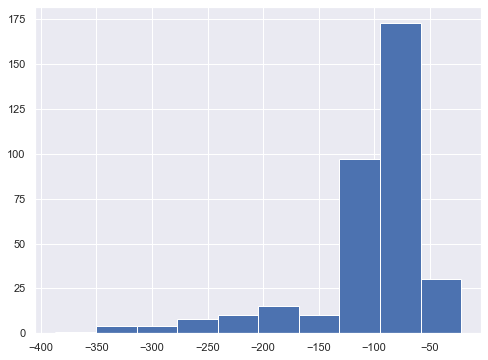

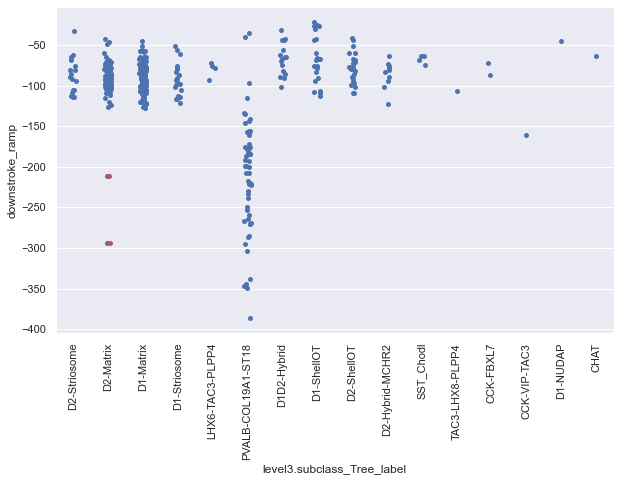

In [17]:
#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
#feat = 'avg_rate_rheo'
feat = 'downstroke_ramp'

#(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
fig,ax = plt.subplots(figsize=(8, 6))
plt.hist(df_ephys_sub_no_outliers[feat])

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df3_filt_sub, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df3_filt_sub.iloc[list(feat_outliers[feat_ind])], x='level3.subclass_Tree_label', y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])

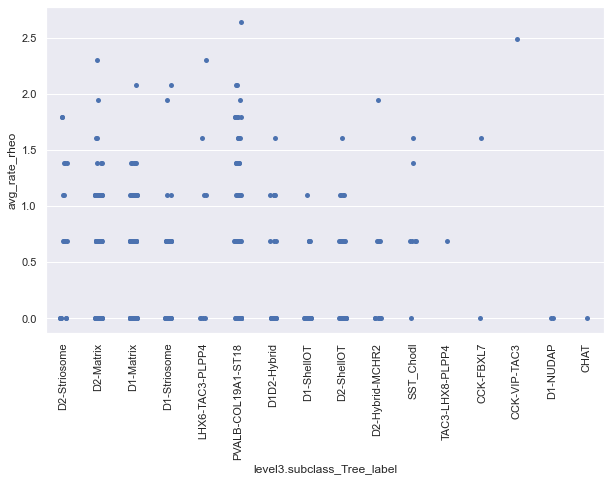

In [18]:
# Check that transformed distributions look more symmetrical

#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
feat = 'avg_rate_rheo'
#feat = 'avg_rate_hero'

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df_ephys_trans, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_trans.columns==feat)[0])

In [19]:
df3_filt_sub.reset_index(inplace=True, drop=True)

#target_names = iris.target_names    # unique list of target categories, indexable from the target numbers
X = df_ephys_trans.iloc[:,594:686]
y = df3_filt_sub['level3.subclass_Tree_label']    # Currently actually using the below

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
print("n samples:", n_samples)
print("n classes:", n_classes)
print("n features:", n_features)

n samples: 531
n classes: 16
n features: 92


In [20]:
# Optional: imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X)  

from sklearn.preprocessing import StandardScaler, RobustScaler

#scaler = RobustScaler()    # Produces weird results, maybe due to skew?
scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

y_orig = df3_filt_sub['level3.subclass_Tree_label']

mean_vec = np.mean(X_std, axis=0)
mean_vec    # Check it's zeroed

array([ 8.69779243e-17,  2.07408897e-16,  3.74674136e-16, -1.63919934e-16,
        1.15413015e-16,  6.69060956e-17,  1.50538715e-16, -1.13740363e-16,
        1.00359143e-17,  8.02873148e-17, -9.41703296e-16,  7.09204614e-16,
        2.67624383e-16, -2.74314992e-16,  1.73955849e-16, -3.84710050e-17,
       -1.94027677e-16,  3.81364745e-16, -7.35967052e-17, -7.05859309e-16,
       -3.01077430e-17,  7.76110709e-16,  8.69779243e-17, -3.34530478e-17,
        9.23304120e-16, -1.20012809e-16, -1.00359143e-16, -3.74674136e-16,
       -9.36685339e-17, -3.34530478e-17,  6.69060956e-17, -1.67265239e-16,
       -1.05711631e-15,  5.18522241e-17, -6.22226690e-16, -1.63919934e-16,
       -4.18163098e-17,  1.33812191e-17, -1.19092850e-15, -6.35607909e-16,
        0.00000000e+00, -5.35248765e-16, -1.23107216e-15, -1.13740363e-16,
        1.33812191e-17,  2.94386821e-16, -1.20430972e-16, -2.67624383e-17,
       -6.18881385e-17, -3.34530478e-17,  5.08486327e-16, -6.15536080e-16,
        4.75033279e-16,  

In [ ]:
# How many nan values are there for each feature


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
0      DD2-Striosome
1         BD2-Matrix
2         AD1-Matrix
3         BD2-Matrix
4         BD2-Matrix
           ...      
526            LCHAT
527      ED1-ShellOT
528    CD1-Striosome
529      FD2-ShellOT
530       AD1-Matrix
Name: level3.subclass_Tree_label, Length: 531, dtype: object
531
['AD1-Matrix' 'BD2-Matrix' 'CD1-Striosome' 'DD2-Striosome' 'ED1-ShellOT'
 'FD2-ShellOT' 'GD1D2-Hybrid' 'HD2-Hybrid-MCHR2' 'ID1-NUDAP' 'JCCK-FBXL7'
 'KCCK-VIP-TAC3' 'LCHAT' 'MLHX6-TAC3-PLPP4' 'NTAC3-LHX8-PLPP4'
 'OPVALB-COL19A1-ST18' 'PSST_Chodl']
Without crossvalidation:
                     precision    recall  f1-score   support

         AD1-Matrix       0.73      0.57      0.64       152
         BD2-Matrix       0.64      0.51      0.57       111
      CD1-Striosome       0.57      0.73      0.64        33
      DD2-Striosome       0.44      0.55      0.49        22
        ED1-ShellOT       0.53      0.62     

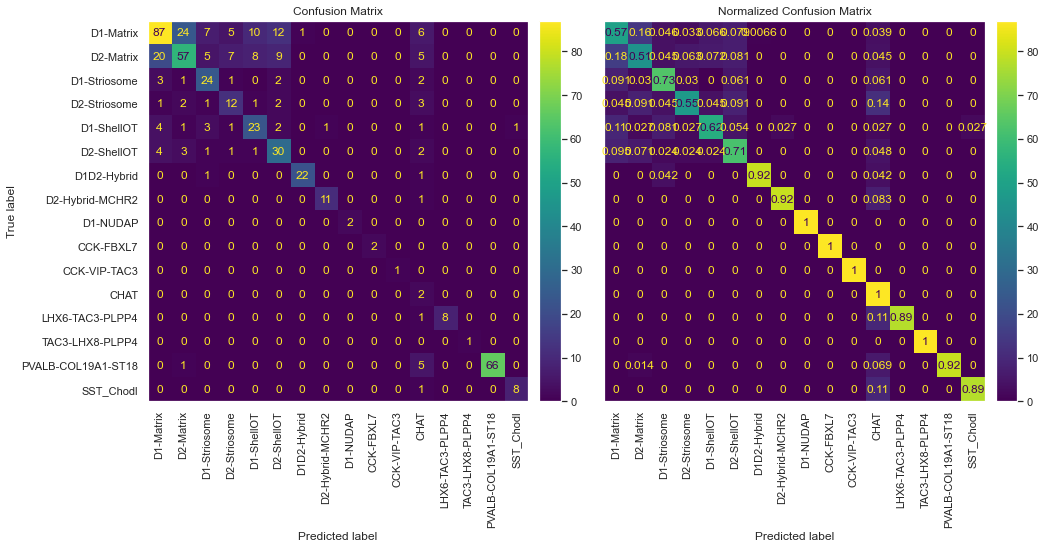

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
X = X_std
y = y_orig
sorted_classes = ['D1-Matrix', 'D2-Matrix',  'D1-Striosome', 'D2-Striosome', 'D1-ShellOT', 'D2-ShellOT', 
                  'D1D2-Hybrid', 'D2-Hybrid-MCHR2', 'D1-NUDAP' , 'CCK-FBXL7', 'CCK-VIP-TAC3', 'CHAT', 
                  'LHX6-TAC3-PLPP4', 'TAC3-LHX8-PLPP4', 'PVALB-COL19A1-ST18', 'SST_Chodl']
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)
y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y_orig
y = y_pref
print(y_pref)
print(len(y_pref))
print(np.unique(y_pref))
#sorted_id = range(len(sorted_classes))
#y_id = [sorted_id[sorted_classes.index(yy)] for yy in y]
#inds = sorted(range(len(y_id)), key=lambda k: y_id[k])
#y_sorted = y[inds]
#X_sorted = X[inds,:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c = 1

clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X, y)

# F1-macro slightly better on multi_class = 'multinomial' but this might be more sensical for distinguishing characteristics printout

#print(clf_lr.classes_)
#coef_sorted = np.empty_like(clf_lr.coef_)
#intercept_sorted = np.empty_like(clf_lr.intercept_)
#for i in range(len(clf_lr.coef_)):
#    coef_sorted[i,:] = clf_lr.coef_ [list(clf_lr.classes_).index(sorted_classes[i]),:]
#    intercept_sorted[i] = clf_lr.intercept_ [list(clf_lr.classes_).index(sorted_classes[i])]
#clf_lr.classes_ = sorted_classes
#clf_lr.coef_ = coef_sorted
#clf_lr.intercept_ = intercept_sorted
#print(clf_lr.coef_[0])

print("Without crossvalidation:")
print(classification_report(y, clf_lr.predict(X)))

y_pred = clf_lr.predict(X)
labels_cropped = [s[1:] for s in clf_lr.classes_]
print(labels_cropped)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
cmp = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels= labels_cropped, ax = ax[0], colorbar=False)
ax[0].grid(False)

# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=labels_cropped, ax = ax[1], normalize='true', 
                                        values_format = '.2g', colorbar=False)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

print("Perc_correct", sum(y_pred==y)/len(y))

# SORT SUBCLASSES BY HIERARCHICAL CLUSTERING

In [22]:
# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=df_ephys_trans.columns[594:686], index = clf_lr.classes_)

df_I

# WITHOUT DOING DIMENSIONALITY REDUCTION, WITH MANY COLINEAR FEATURES, YOU MAY HAVE DECENT PERFORMANCE BUT POOR COEFFICIENT INTERPRETABILITY

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.8] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")

AD1-Matrix:threshold_v_rheo   -0.81
median_isi_hero    -0.91
downstroke_hero     0.96
Name: AD1-Matrix, dtype: float64
BD2-Matrix:upstroke_ramp            1.05
width_short_square       0.94
upstroke_short_square    0.88
input_resistance_ss     -0.86
width_rheo              -1.26
upstroke_rheo            0.84
downstroke_rheo          1.29
downstroke_hero          1.09
Name: BD2-Matrix, dtype: float64
CD1-Striosome:downstroke_ramp                  -0.81
postap_slope_ramp                -1.05
peak_deltav_ramp                  1.18
width_short_square               -0.99
upstroke_short_square            -0.94
downstroke_short_square           0.84
width_suprathresh_short_square   -0.80
threshold_v_rheo                 -1.04
postap_slope_rheo                 0.95
adp_v_last_rheo                   0.87
adapt_hero                       -0.91
avg_rate_hero                    -0.91
mean_isi_hero                     1.44
median_isi_hero                  -1.57
downstroke_adapt_ratio            0.8

     upstroke_downstroke_ratio_ramp  threshold_v_ramp  width_ramp  \
0                         -0.000754         -0.070235   -0.043213   
1                         -0.000754         -0.070235   -0.043213   
2                         -0.455217         -0.657826   -0.142958   
3                          0.173314         -0.891844   -0.062826   
4                         -0.415744         -0.472875    0.149290   
..                              ...               ...         ...   
526                       -0.000754         -0.070235   -0.043213   
527                        0.036620         -0.150158    0.567864   
528                       -0.054827          0.198353   -0.218377   
529                       -0.579973          0.739127    0.498432   
530                        0.148746         -0.661915    0.170973   

     upstroke_ramp  downstroke_ramp  width_suprathresh_ramp  trough_v_ramp  \
0         0.041290        -0.047358               -0.041200      -0.072377   
1         0.041

<Axes: xlabel='level3.subclass_Tree_label', ylabel='downstroke_ramp'>

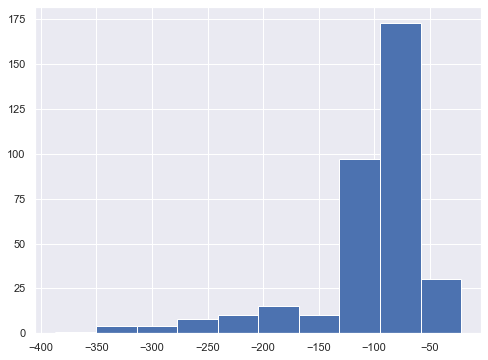

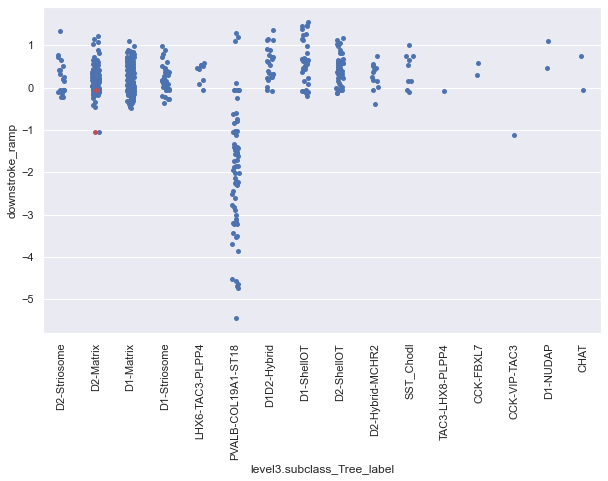

In [23]:
# See features after transforming and normalizing
#feat = 'width_rheo'
feat = 'downstroke_ramp'
#feat = 'avg_rate_rheo'
#feat = 'sag_tau'
#feat = 'downstroke_rheo'

#df_std = pd.DataFrame(df_ephys_trans.iloc[:,267:359], columns = df3_filt_sub.columns[267:359])
df_std = pd.DataFrame(X_std, columns = df3_filt_sub.columns[594:686])
print(df_std)
df_std['level3.subclass_Tree_label'] = df3_filt_sub['level3.subclass_Tree_label']

#(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
fig,ax = plt.subplots(figsize=(8, 6))
plt.hist(df_ephys_sub_no_outliers[feat])

fig,ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df_std, x='level3.subclass_Tree_label', y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df_std.iloc[list(feat_outliers[feat_ind])], x='level3.subclass_Tree_label', y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])
# Because they were set to Nan, they got imputed

In [24]:
# Sparse principal component analysis

feat_names = df_ephys_sub.columns[:92]
#print(feat_names)
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = df_ephys_sub.columns[:92]

#In R: para=rep(300, ncomp)   --> 22 components

# Sparse PCA in R
X_std_df.to_feather('X_std_BG.feather')
# Process then in R elasticnet implementation

# Consider using a PEV threshold?


In [25]:
df_spca = pd.read_feather('spca_comps.feather')
sums = df_spca.abs().sum(axis=0)

df_spca = df_spca.drop(df_spca.columns[sums==0],axis = 1)

In [26]:
print(feat_names[np.nonzero(df_spca.iloc[:,0].values)])
comp_names = ['downstroke-width']

Index(['downstroke_ramp', 'width_suprathresh_ramp', 'width_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'width_rheo', 'downstroke_rheo', 'width_hero',
       'width_suprathresh_hero'],
      dtype='object')


In [27]:
print(feat_names[np.nonzero(df_spca.iloc[:,1].values)])
comp_names.append('upstroke-peak')

Index(['upstroke_downstroke_ratio_ramp', 'peak_deltav_ramp',
       'upstroke_downstroke_ratio_short_square', 'upstroke_short_square',
       'peak_deltav_short_square', 'upstroke_downstroke_ratio_rheo',
       'peak_v_rheo', 'upstroke_rheo', 'upstroke_downstroke_ratio_hero',
       'peak_v_hero', 'upstroke_hero', 'peak_deltav_rheo', 'peak_deltav_hero',
       'phase_peak_chirp'],
      dtype='object')


In [28]:
print(feat_names[np.nonzero(df_spca.iloc[:,2].values)])
comp_names.append('chirp')

Index(['peak_freq_chirp', '3db_freq_chirp', 'peak_impedance_chirp',
       'sync_freq_chirp'],
      dtype='object')


In [29]:
print(feat_names[np.nonzero(df_spca.iloc[:,3].values)])
comp_names.append('fast_trough')

Index(['fast_trough_deltav_ramp', 'fast_trough_deltav_rheo',
       'fast_trough_deltav_hero'],
      dtype='object')


In [30]:
print(feat_names[np.nonzero(df_spca.iloc[:,4].values)])
comp_names.append('threshold-trough')

Index(['threshold_v_ramp', 'trough_v_ramp', 'threshold_v_short_square',
       'threshold_v_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'fast_trough_v_last_rheo', 'adp_v_last_rheo', 'threshold_v_hero',
       'trough_v_hero', 'fast_trough_v_hero'],
      dtype='object')


In [31]:
print(feat_names[np.nonzero(df_spca.iloc[:,5].values)])
comp_names.append('isi_cv')

Index(['isi_cv_mean'], dtype='object')


In [32]:
print(feat_names[np.nonzero(df_spca.iloc[:,6].values)])
comp_names.append('trough_slowdeltav')

Index(['trough_slowdeltav_rheo', 'trough_slowdeltav_hero'], dtype='object')


In [33]:
print(feat_names[np.nonzero(df_spca.iloc[:,7].values)])
comp_names.append('isi_hero')

Index(['mean_isi_hero', 'median_isi_hero'], dtype='object')


In [34]:
print(feat_names[np.nonzero(df_spca.iloc[:,8].values)])
comp_names.append('peak_v_adapt_ratio')

Index(['upstroke_adapt_ratio', 'peak_v_adapt_ratio'], dtype='object')


In [35]:
print(feat_names[np.nonzero(df_spca.iloc[:,9].values)])
comp_names.append('rheobase_Rin')

Index(['threshold_i_ramp', 'rheobase_i', 'input_resistance_ss',
       'low_freq_impedance_chirp'],
      dtype='object')


In [36]:
print(feat_names[np.nonzero(df_spca.iloc[:,10].values)])
comp_names.append('postap_slope')

Index(['postap_slope_ramp', 'postap_slope_rheo', 'postap_slope_hero'], dtype='object')


In [37]:
print(feat_names[np.nonzero(df_spca.iloc[:,11].values)])
comp_names.append('isi_rheo')

Index(['sag_area'], dtype='object')


In [38]:
print(feat_names[np.nonzero(df_spca.iloc[:,12].values)])
comp_names.append('vm_for_sag')

Index(['v_baseline', 'vm_for_sag'], dtype='object')


In [39]:
print(feat_names[np.nonzero(df_spca.iloc[:,13].values)])
comp_names.append('latency')

Index(['latency_rheo', 'latency_hero'], dtype='object')


In [40]:
print(feat_names[np.nonzero(df_spca.iloc[:,14].values)])
comp_names.append('sag_tau')

Index(['sag_tau_depol'], dtype='object')


In [41]:
print(feat_names[np.nonzero(df_spca.iloc[:,15].values)])
comp_names.append('avg_rate_rheo')

Index(['avg_rate_rheo'], dtype='object')


In [42]:
print(feat_names[np.nonzero(df_spca.iloc[:,16].values)])
comp_names.append('phase_low_chirp')

Index(['phase_low_chirp'], dtype='object')


In [43]:
print(feat_names[np.nonzero(df_spca.iloc[:,17].values)])
comp_names.append('sag_depol')

Index(['sag_depol', 'sag_area_depol'], dtype='object')


In [44]:
print(feat_names[np.nonzero(df_spca.iloc[:,18].values)])
comp_names.append('sag')

Index(['sag'], dtype='object')


In [45]:
print(feat_names[np.nonzero(df_spca.iloc[:,19].values)])
comp_names.append('sag_tau')

Index(['sag_tau'], dtype='object')


In [46]:
print(feat_names[np.nonzero(df_spca.iloc[:,20].values)])
comp_names.append('fi_rates')

Index(['fi_fit_slope', 'avg_rate_hero', 'avg_rate_max'], dtype='object')


In [47]:
print(feat_names[np.nonzero(df_spca.iloc[:,21].values)])
comp_names.append('Rin')

Index(['input_resistance'], dtype='object')


In [71]:
print(feat_names[np.nonzero(df_spca.iloc[:,22].values)])
#comp_names.append('sag_depol')

IndexError: single positional indexer is out-of-bounds

In [72]:
print(feat_names[np.nonzero(df_spca.iloc[:,23].values)])
#comp_names.append('sag_depol')

IndexError: single positional indexer is out-of-bounds

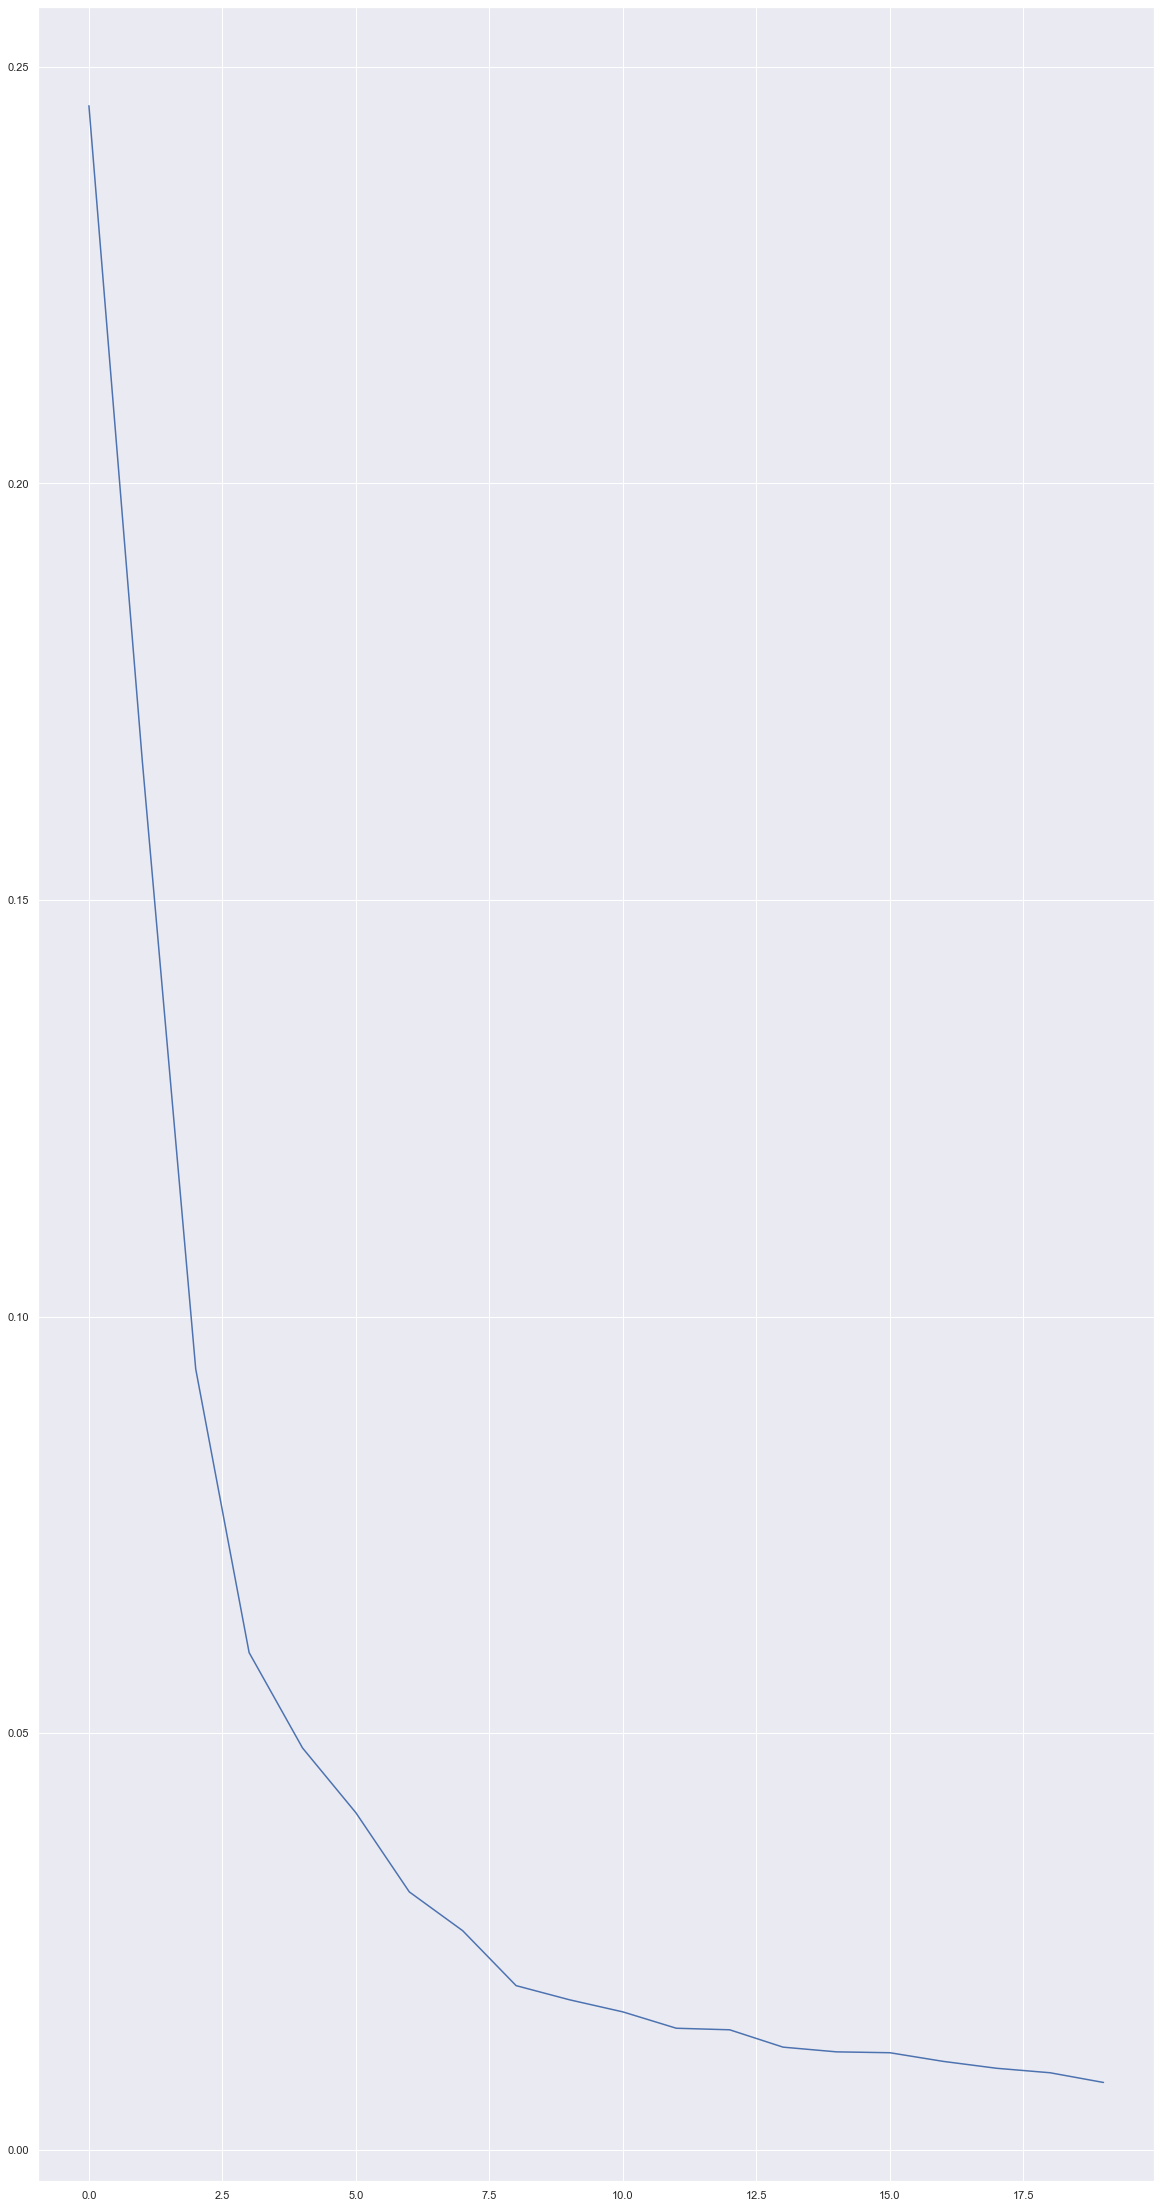

In [66]:
# Plain PCA with its own imputation?
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_std)
X_pca = pca.transform(X_std)
plt.plot(pca.explained_variance_ratio_)


In [69]:
# Remove subclasses with less than 5 cells - causes problems for crossvalidation scores further down and noisy
# Currently removes 'CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'

cts = y_orig.value_counts()
insuff_subclasses = cts.index[cts<5]
notinsuff_inds = [s not in insuff_subclasses for s in y_orig]
y_suff = y_orig[notinsuff_inds]
#X_suff = X_pca[notinsuff_inds,:]
X_suff = X_std[notinsuff_inds,:]
y_suff = y_suff.reset_index(drop=True)

print(insuff_subclasses)

Index(['CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'], dtype='object')


Perc_correct 0.6749521988527725
0.4767529183895717
0.003
C with best perc_corr_test: 0.003


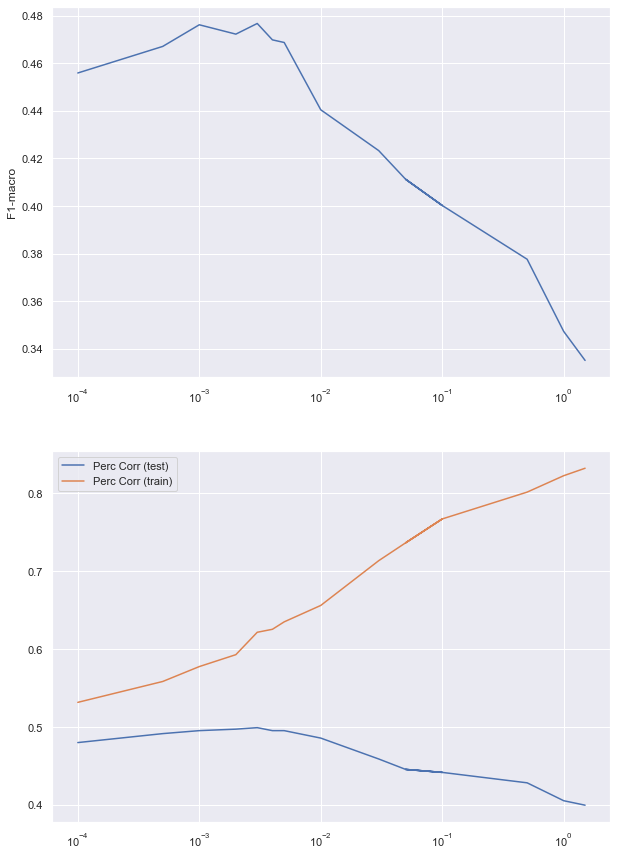

In [70]:
# Crossvalidation on common types and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

kf =KFold(n_splits=2, shuffle=True, random_state=1)

X_transformed = X_std @ df_spca.values

#X = X_transformed    
#X = X_std
#y = y_orig
X = X_suff
y = y_suff

#C_list = [5.0, 3.0, 1.0, 0.8, 0.5, 0.1, 0.09, 0.08, 0.07, 0.05]
C_list = [1.5, 1.0, 0.5, 0.1, 0.05, 0.1, 0.05, 0.03, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0.0001]
perc_corr_all = []
perc_corr_all_train = []
f1_all = []
roc_auc_ovr = []

# Worse performance than using original features
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=1).fit(X, y)
y_pred = clf_lr.predict(X)
print("Perc_correct", sum(y_pred==y)/len(y))
# 0.53 with X_transformed
# 0.696 with X_std - why was it 0.69 last time?

for c in C_list:
    perc_corr = []
    perc_corr_train = []
    f1_list = []
    roc_list = []
    for train_index, test_index in kf.split(X, y):
        #clf_lr = LogisticRegression(solver="saga", multi_class='ovr', penalty = "elasticnet", l1_ratio = 0.5, max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="liblinear", multi_class='ovr', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="lbfgs", multi_class='multinomial', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=c).fit(X[train_index], y[train_index])
        #Predict the response for test dataset
        y_pred = clf_lr.predict(X[test_index])
        f1 = f1_score(y[test_index], y_pred, average="macro")
        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        y_pred_train = clf_lr.predict(X[train_index])
        perc_corr_train.append(sum(y_pred_train==y[train_index])/len(y[train_index]))
        f1_list.append(f1)
        #roc = roc_auc_score(y[test_index], clf_lr.predict_proba(X[test_index]), average="macro", multi_class = 'ovr')
        #roc_list.append(roc)
    #print('Perc_corr:', np.mean(perc_corr))
    #print('Perc_corr_train:', perc_corr_train)
    #print(np.mean(f1_list))
    #print(np.mean(roc_list))
    perc_corr_all.append(np.mean(perc_corr))
    perc_corr_all_train.append(np.mean(perc_corr_train))
    f1_all.append(np.mean(f1_list))
    #roc_auc_ovr.append(np.mean(roc_list))

fig, ax = plt.subplots(2,1, figsize=(10, 15))
    
ax[0].plot(C_list, f1_all)
ax[0].set_ylabel('F1-macro')
ax[0].set_xscale("log")

#plt.figure()
#plt.plot(C_list, roc_auc_ovr)
#plt.ylabel('ROC_AUC_OVR')

ax[1].plot(C_list, perc_corr_all, label = 'Perc Corr (test)')
#ax[1].set_ylabel('Perc Correct (test)')

ax[1].plot(C_list, perc_corr_all_train, label = 'Perc Corr (train)')
#ax[1].set_ylabel('Perc Correct (train)')
plt.legend()
plt.xscale("log")
#plt.show()
#ax[1].legend([line1, line2], ['Perc Corr (test)', 'Perc Corr (train)'])
#ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
#ax[1].legend(['Perc Corr (test)', 'Perc Corr (train)'])

print(max(f1_all))
print(C_list[np.argmax(f1_all)])
C_opt = C_list[np.argmax(f1_all)]
print("C with best perc_corr_test:", C_list[np.argmax(perc_corr_all)])

# Still a hair better than PCA

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
0.46946564885496184


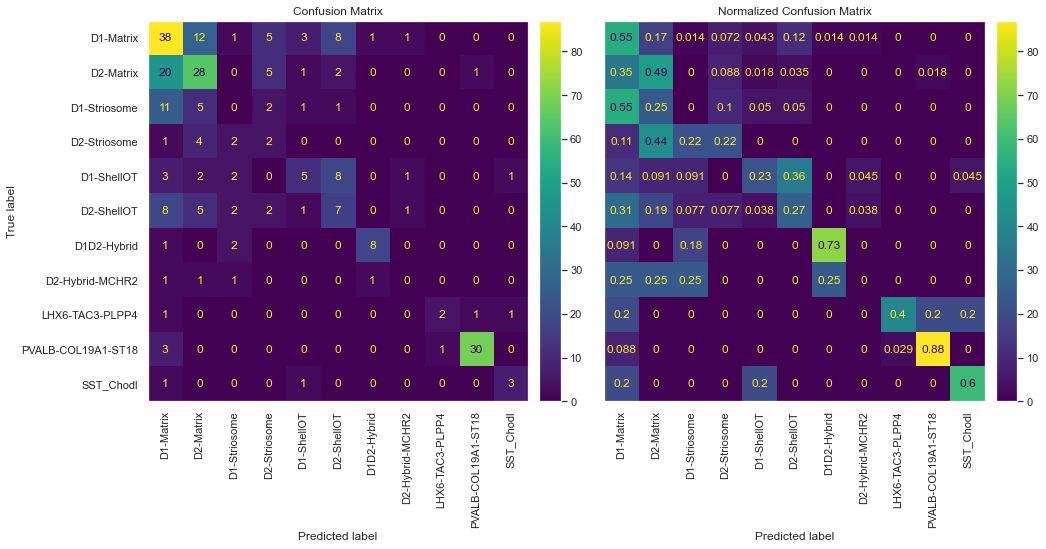

In [63]:
# Using best C, generate confusion matrix
# Prepend letters because sklearn sorts classes alphabetically
sorted_prefix = [chr(ord('@')+num+1) for num in  range(len(sorted_classes))]
print(sorted_prefix)

#X = X_transformed    
#X = X_std
#y = y_orig
X = X_suff
y = y_suff

y_pref = [sorted_prefix[sorted_classes.index(yy)] for yy in y] + y
y = y_pref

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=100000, C=C_opt).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

labels_cropped = [s[1:] for s in clf_lr.classes_]   # Remove prefix

print(sum(y_pred==y_test)/len(y_pred))

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_cropped, ax = ax[0], colorbar=False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].grid(False)
# Adding custom colorbar - default one is too tall and makes plot small
cax = fig.add_axes([ax[0].get_position().x1+0.01,ax[0].get_position().y0,0.02,ax[0].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_cropped, ax = ax[1], normalize='true',colorbar=False)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
cax = fig.add_axes([ax[1].get_position().x1+0.01,ax[1].get_position().y0,0.02,ax[1].get_position().height])
plt.colorbar(cmp.im_,  cax=cax)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].grid(False)
ax[1].get_yaxis().set_visible(False)

# D2-Hybrid-MCHR2 not working at all

In [71]:
# Try logitboost

from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)


# Actually has lower f1-macro

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9540
Test accuracy:     0.4686
Training
                    precision    recall  f1-score   support

         D1-Matrix       0.99      0.96      0.97       101
        D1-ShellOT       1.00      1.00      1.00        24
      D1-Striosome       1.00      0.95      0.98        22
       D1D2-Hybrid       1.00      0.94      0.97        16
   D2-Hybrid-MCHR2       1.00      1.00      1.00         8
         D2-Matrix       0.83      0.99      0.90        74
        D2-ShellOT       1.00      0.96      0.98        28
      D2-Striosome       1.00      0.80      0.89        15
   LHX6-TAC3-PLPP4       1.00      0.83      0.91         6
PVALB-COL19A1-ST18       1.00      0.94      0.97        48
         SST_Chodl       1.00      0.83      0.91         6

          accuracy                           0.95       348
         macro avg       0.98      0.93      0.95       348
      weighted avg       0.96      0.95      0.95       348

Test
                    precision  

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
# Try random forest



In [ ]:
# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=df_ephys_sub.columns[:92], index = clf_lr.classes_)

df_I

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.7] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")
    
    
    # NEED ALSO PVALS
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


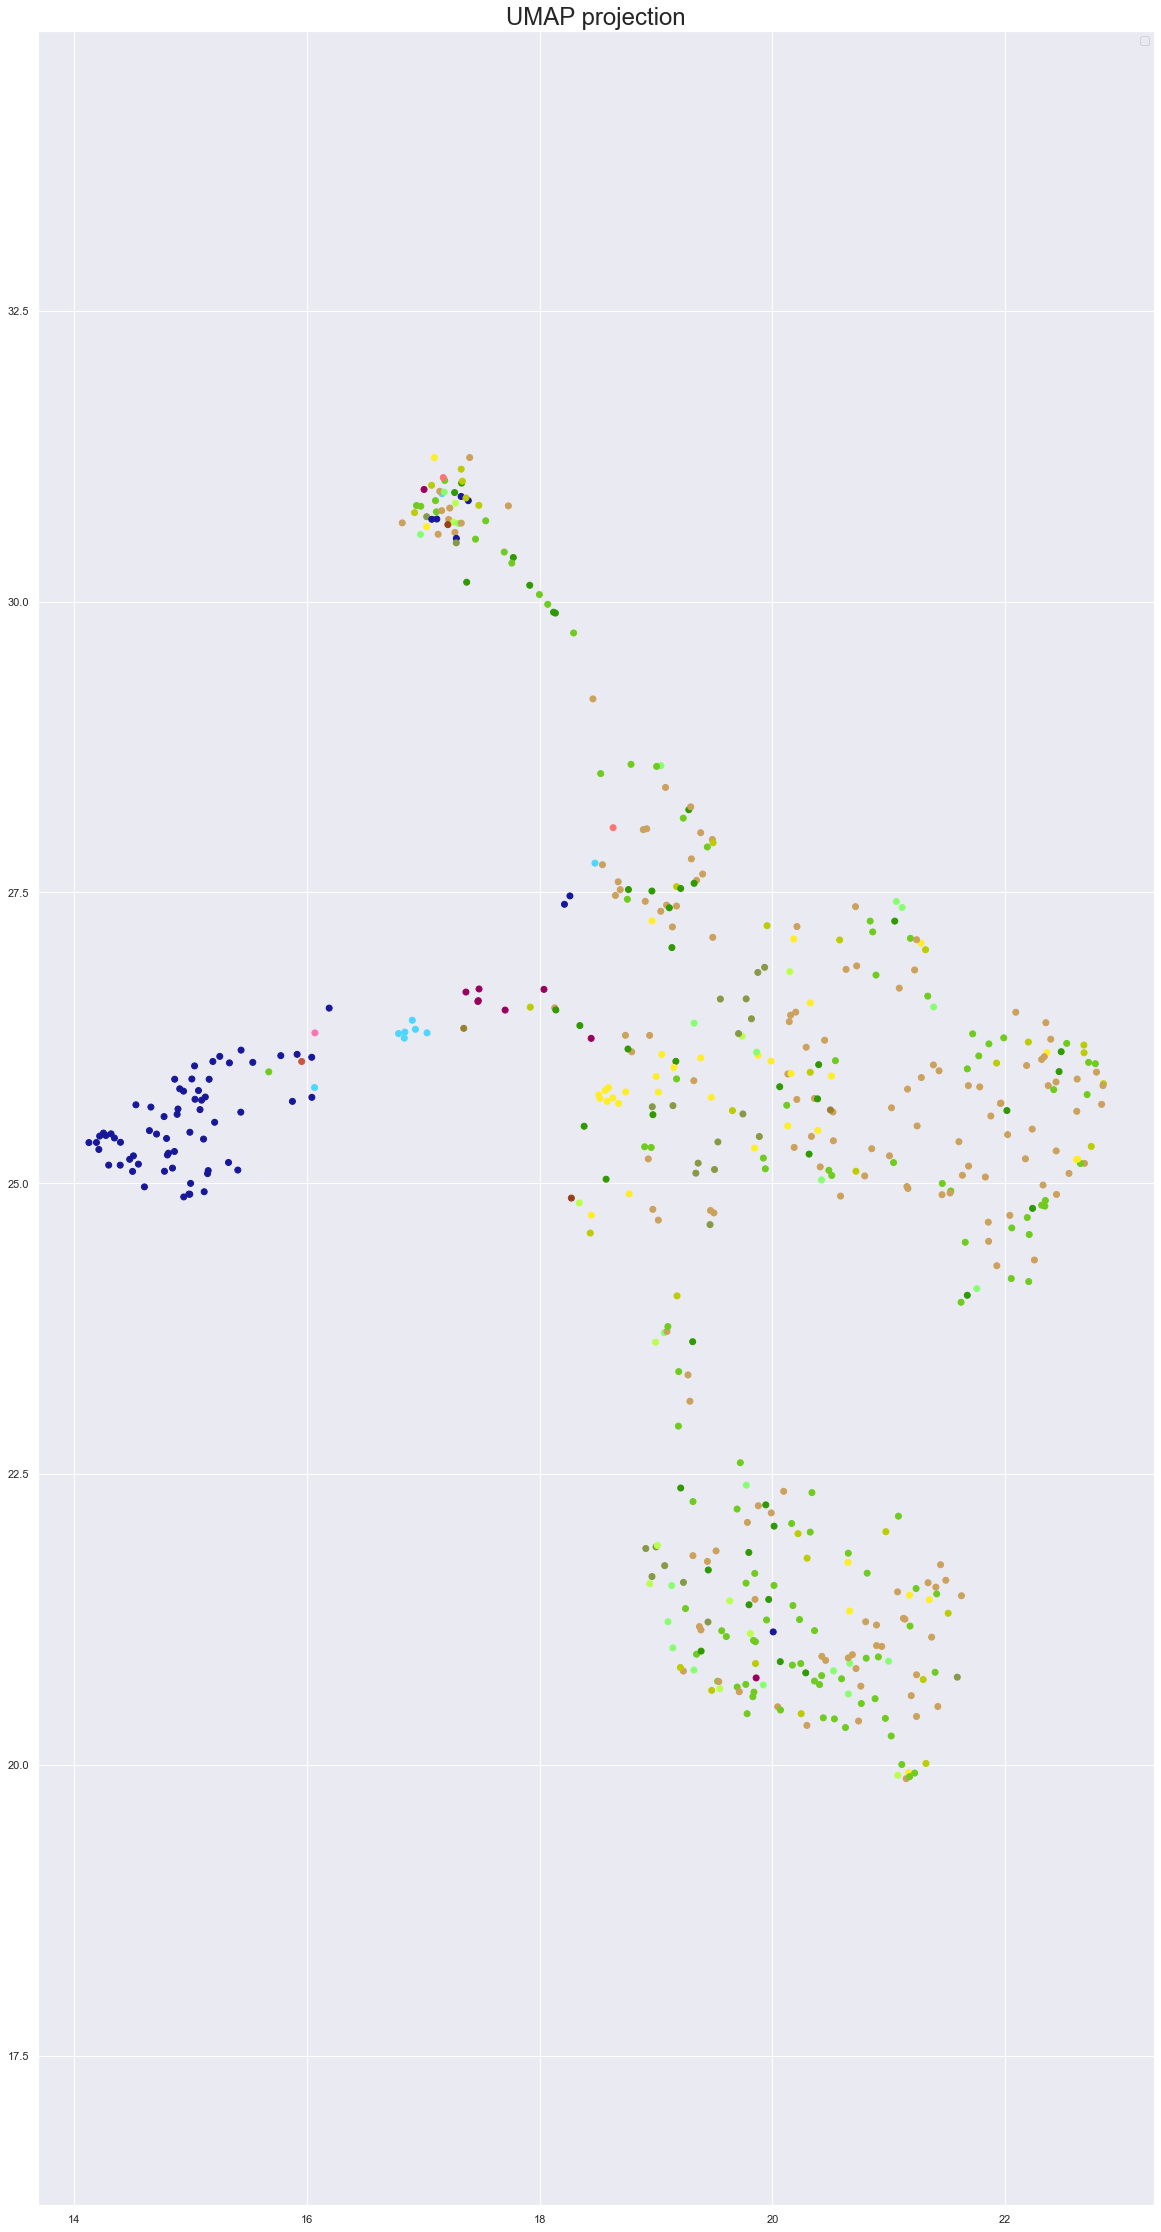

In [80]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = df_ephys_trans['level3.subclass_Tree_color'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.legend()



TypeError: cannot perform reduce with flexible type

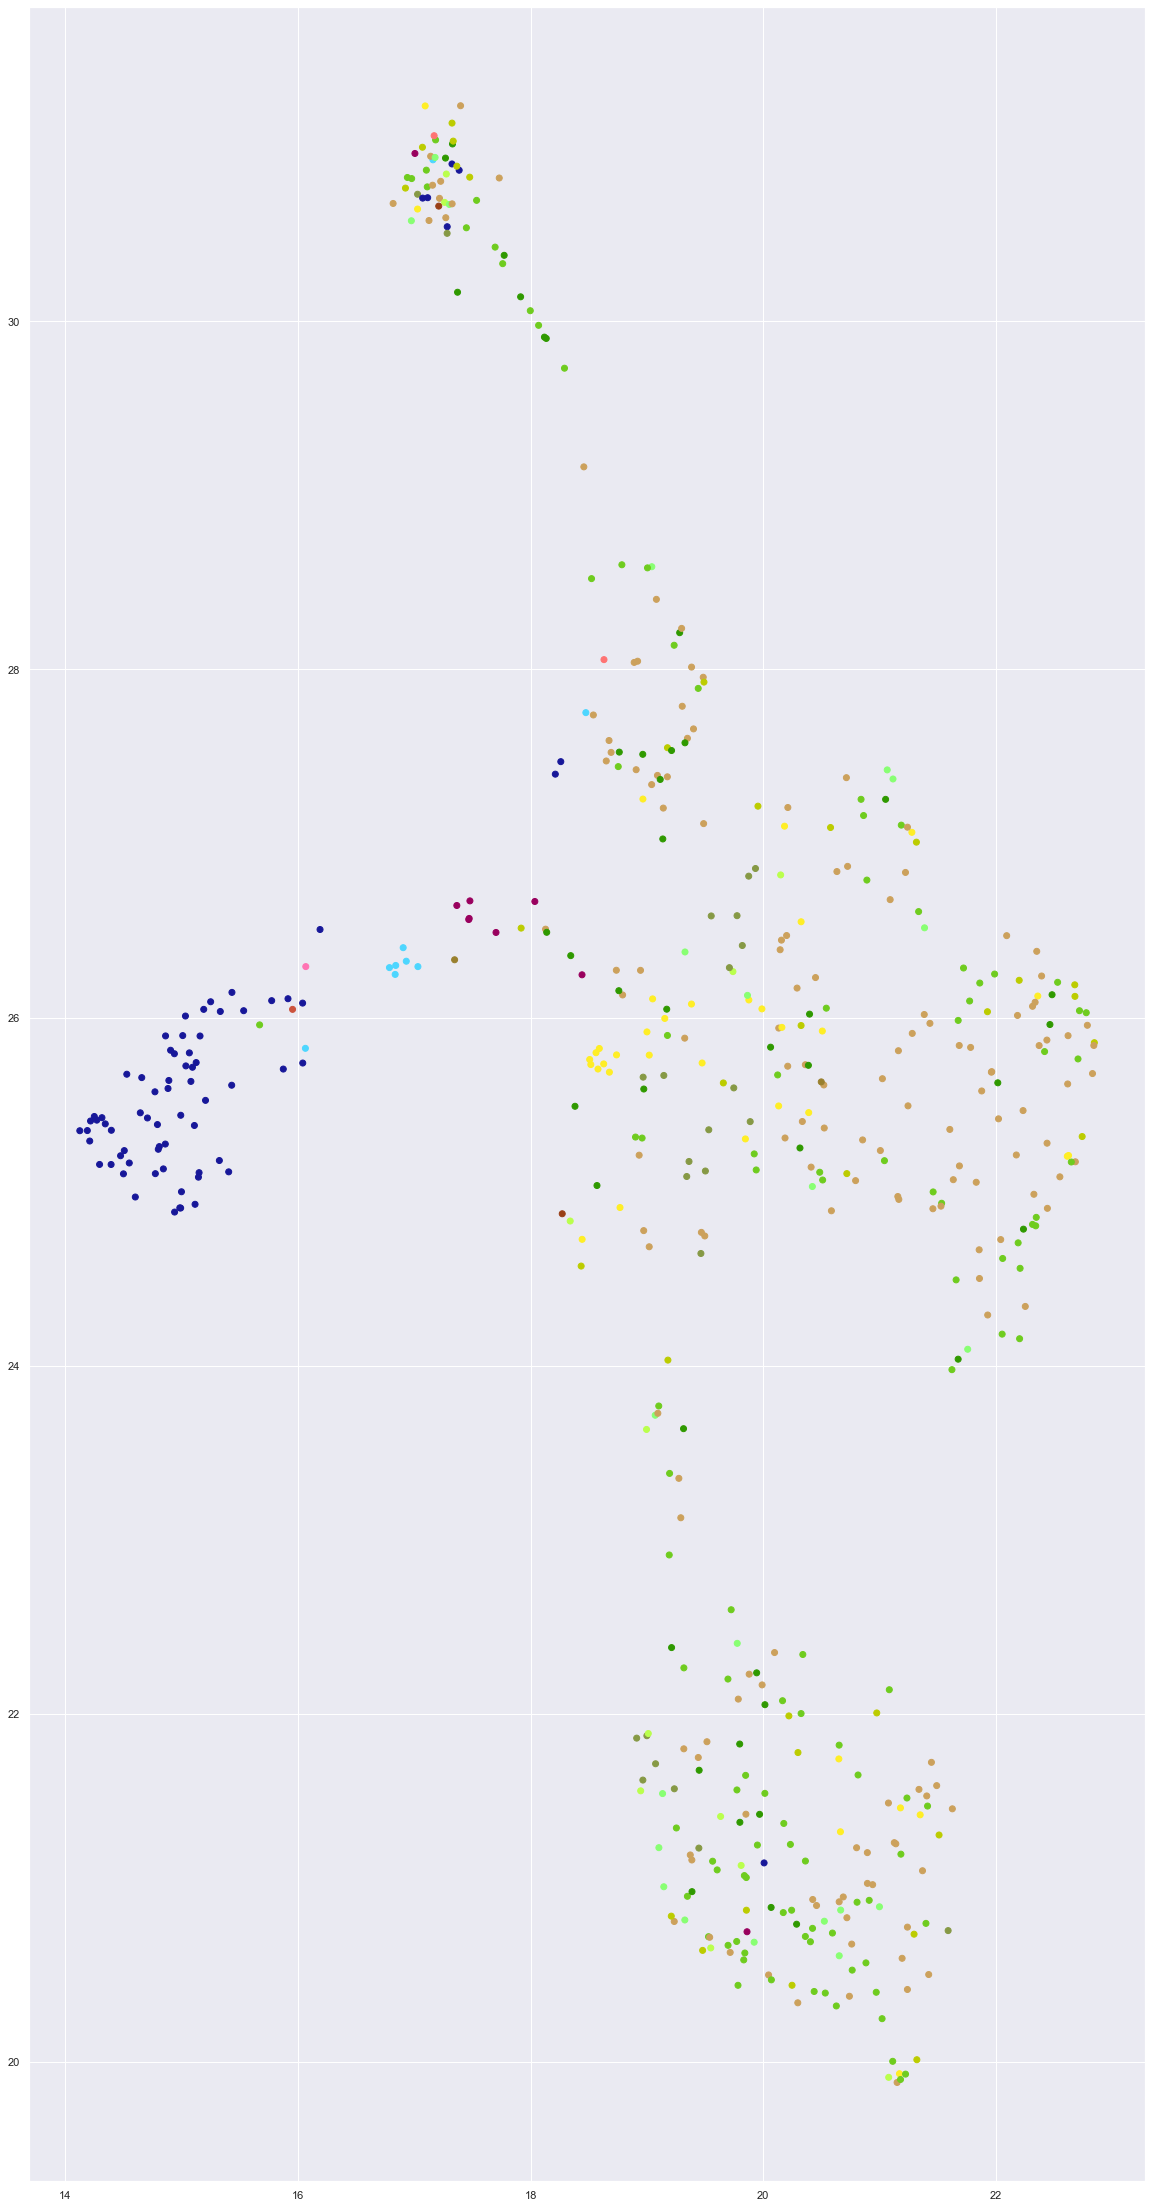

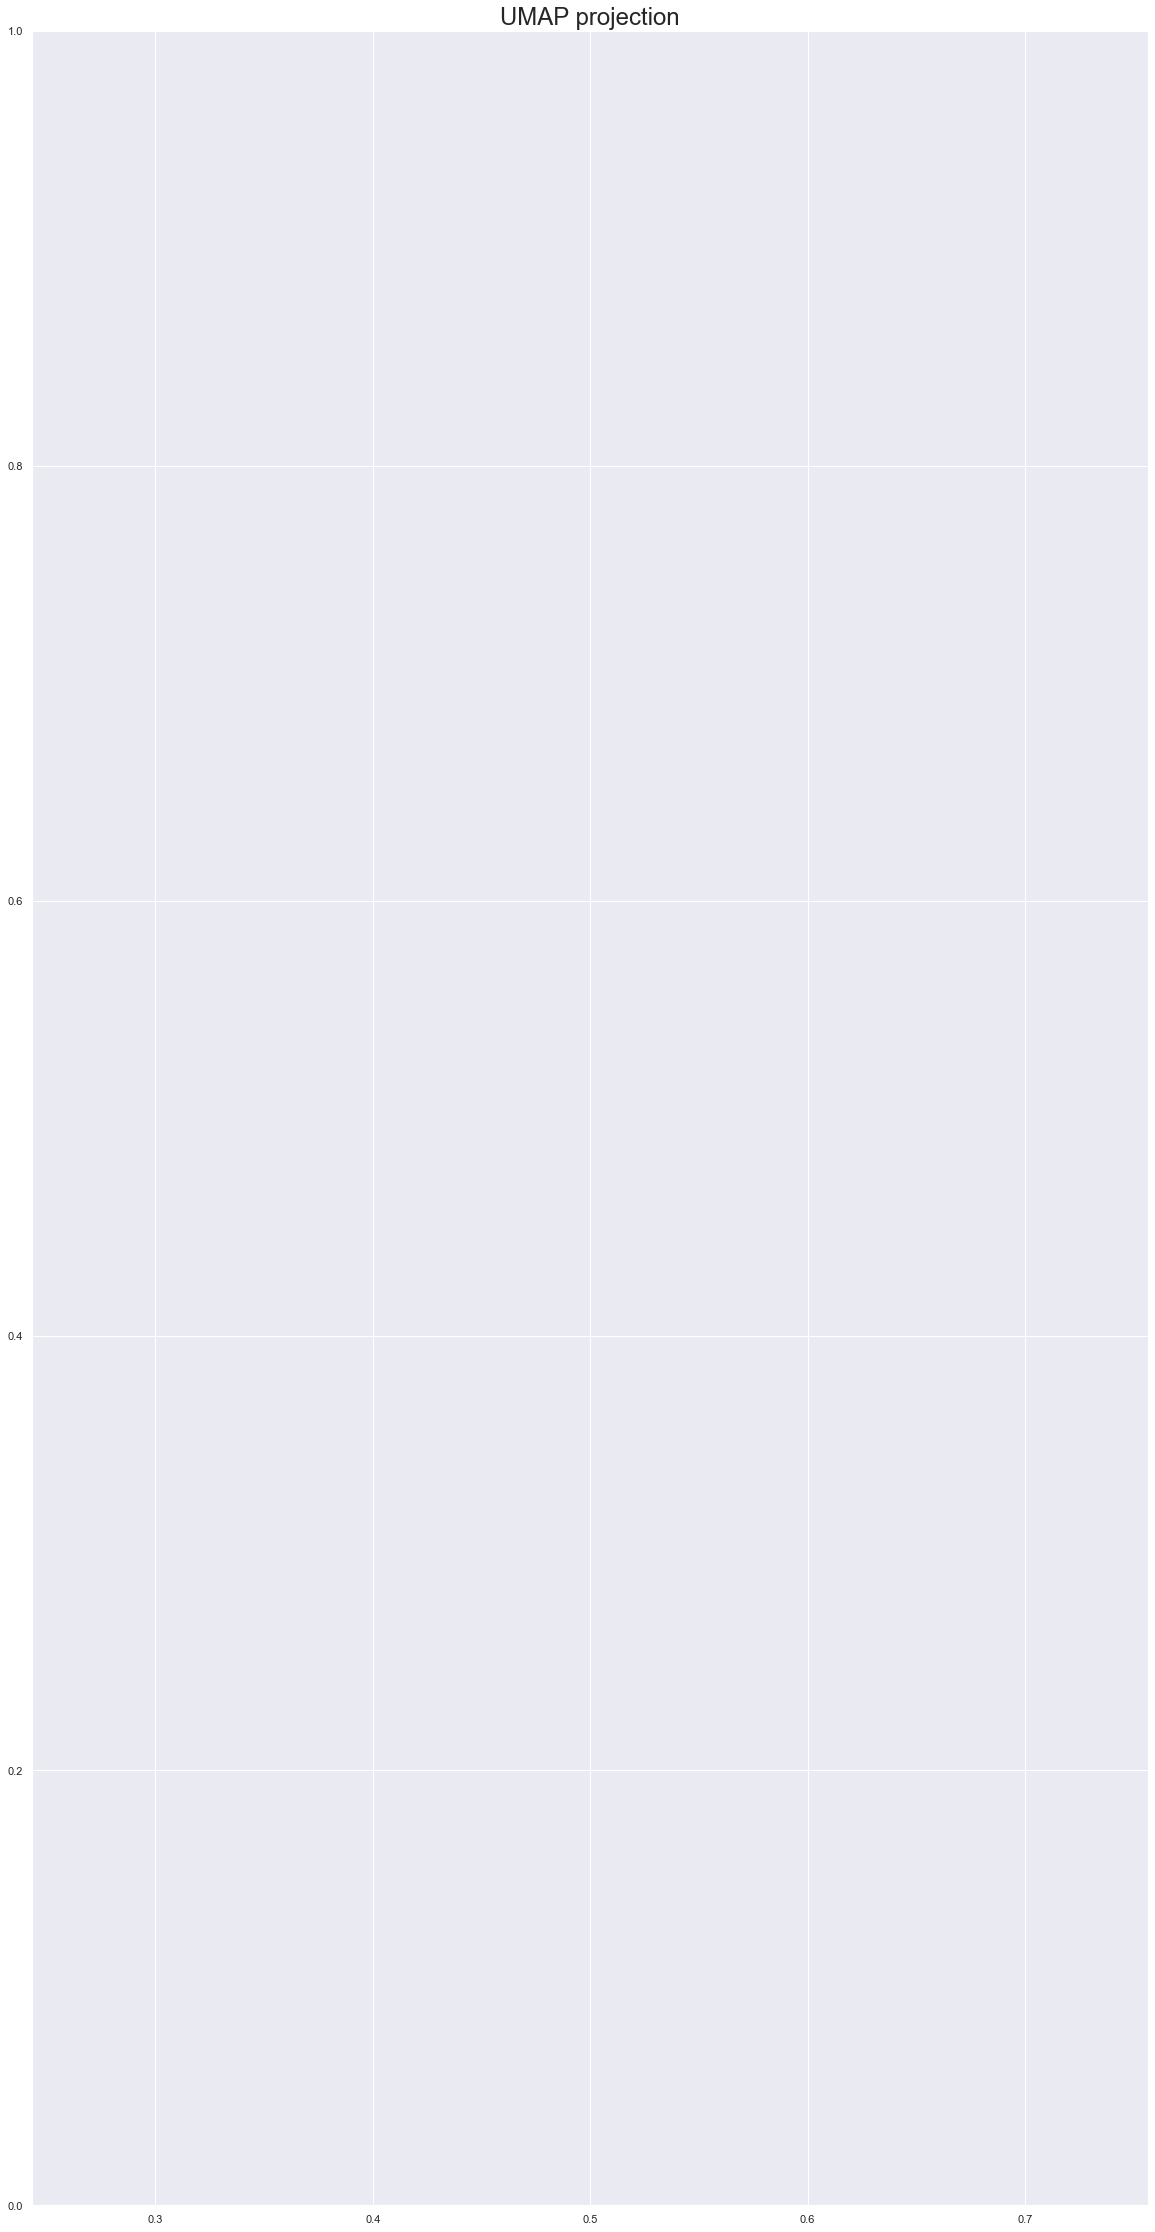

In [89]:
sc = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=[sns.color_palette()[sc_dict[yy]] for yy in y]
    c = df_ephys_trans['level3.subclass_Tree_color'])
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')
ax.set_title('UMAP projection', fontsize=24)
#plt.legend()

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in df_ephys_trans['level3.subclass_Tree_color']]
plt.legend(handles=handles)



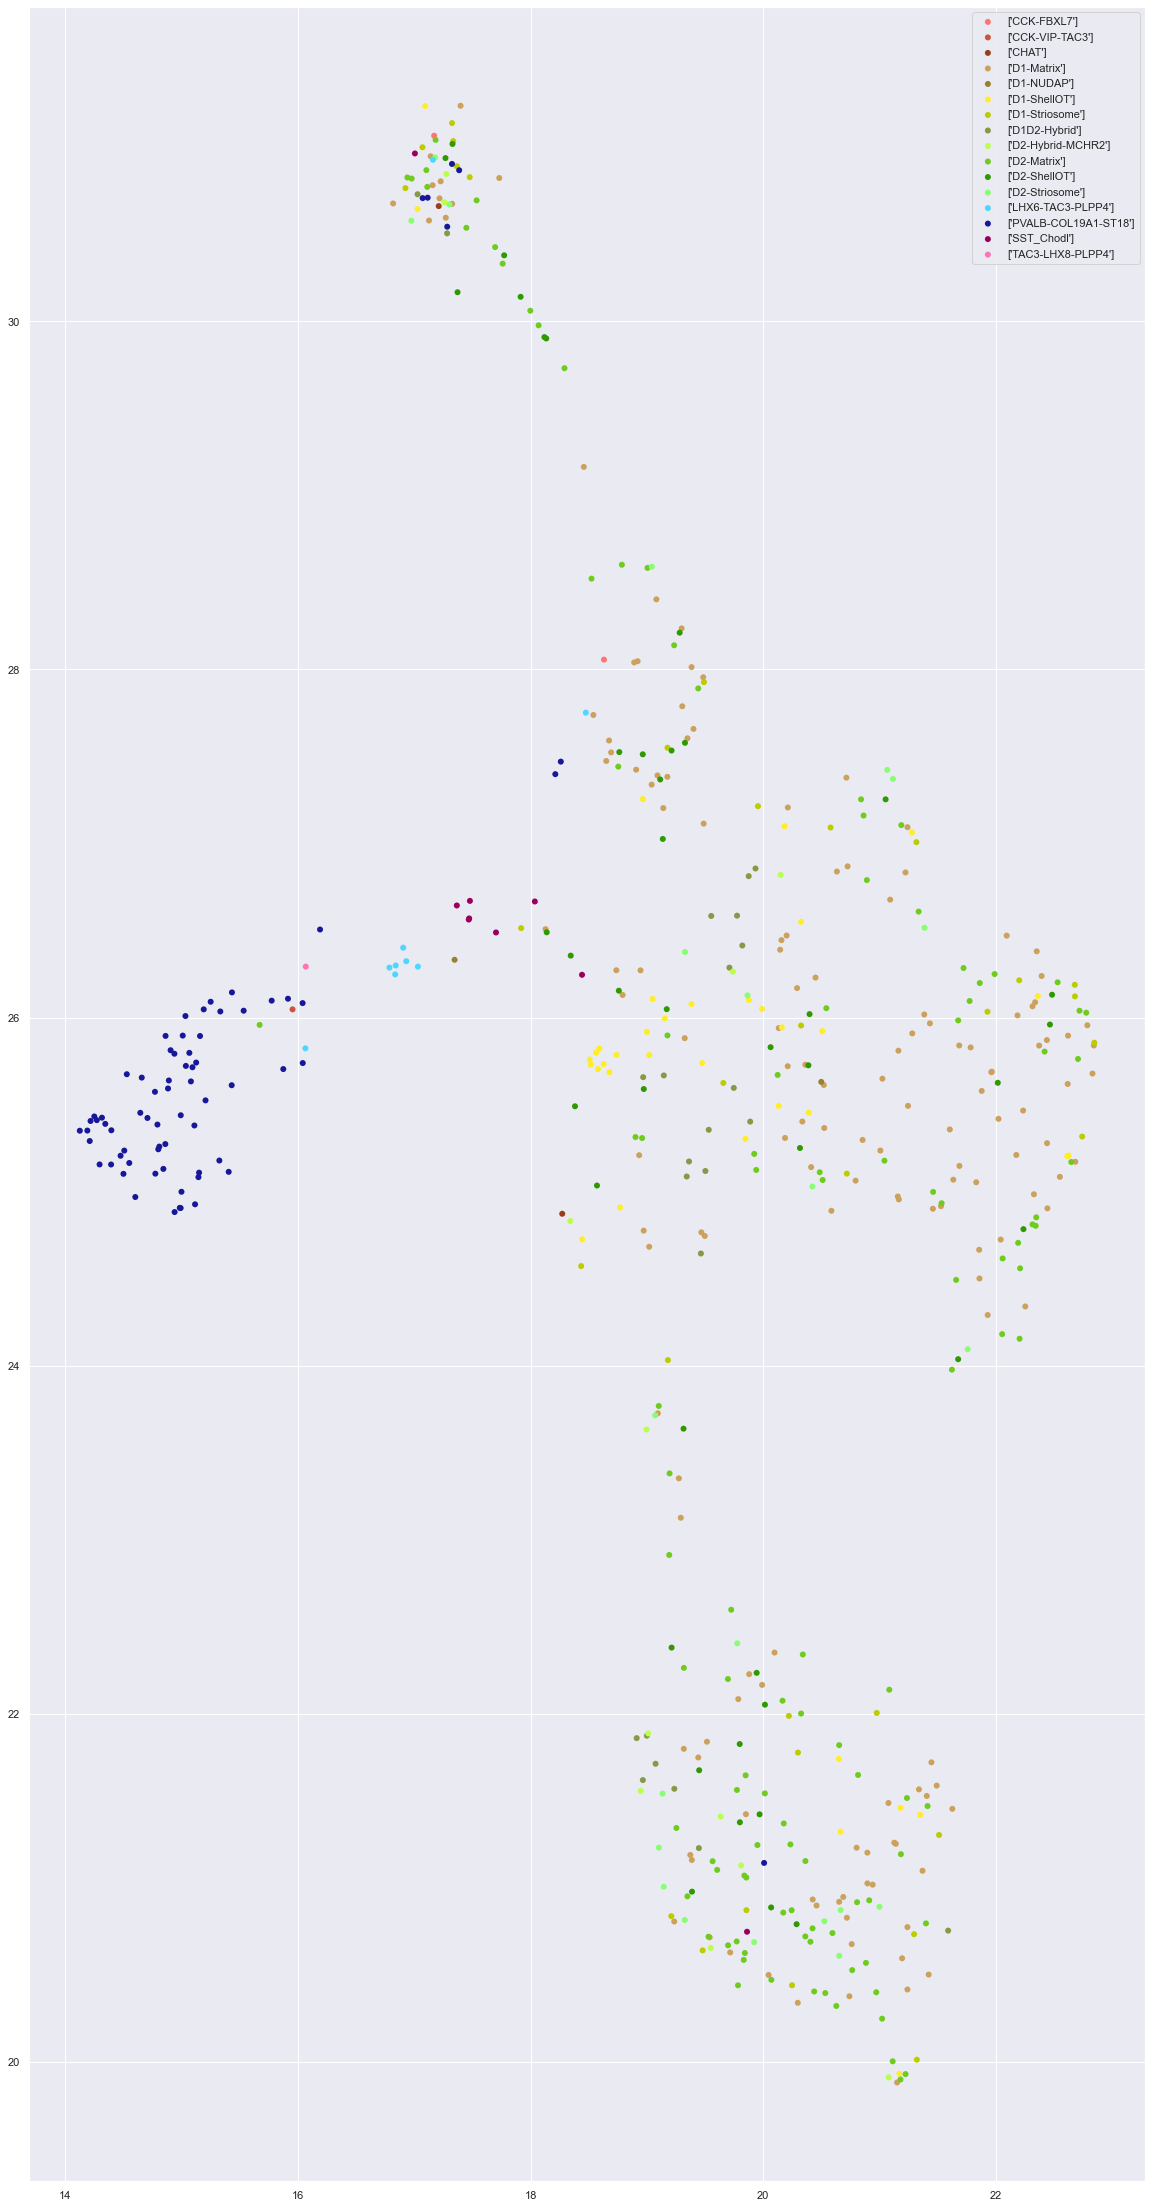

In [105]:
df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

for i, dff in df.groupby("level3.subclass_Tree_label"):
    plt.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label']))

plt.legend()

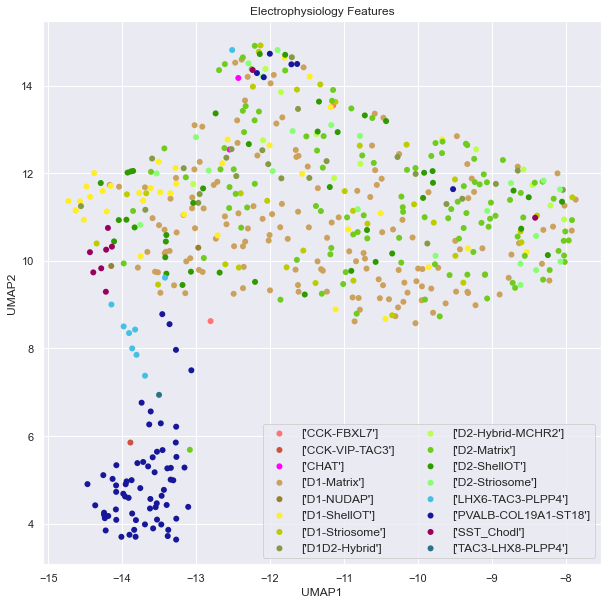

In [202]:
# Without chirp features

# Modify confusing colors

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='CHAT','level3.subclass_Tree_color'] = '#FF00FF'

df_ephys_trans.loc[df_ephys_trans['level3.subclass_Tree_label']=='TAC3-LHX8-PLPP4','level3.subclass_Tree_color'] = '#297389'

X_no_chirp = df_ephys_trans.iloc[:,594:677]

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X_no_chirp)  

scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

reducer = umap.UMAP(
        n_neighbors= 120,   # Default 15, 120 is looking good
        min_dist=0.4,  # Default 0.1, 0.4 is looking good
        #n_components=n_components,
        metric='manhattan',
        random_state = 42
    )
embedding = reducer.fit_transform(X_std)

sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))

df = pd.DataFrame(df_ephys_trans['level3.subclass_Tree_color'])
df['level3.subclass_Tree_label'] = df_ephys_trans['level3.subclass_Tree_label']
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

fig, ax = plt.subplots(figsize=(10, 10))

for i, dff in df.groupby("level3.subclass_Tree_label"):
    ax.scatter(dff['UMAP1'], dff['UMAP2'], c=np.unique(dff['level3.subclass_Tree_color']), 
                edgecolors='none', label=np.unique(dff['level3.subclass_Tree_label']))
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_title('Electrophysiology Features')
plt.legend(ncol =2, fancybox=True, fontsize='medium')

In [ ]:
# MSN's only



In [153]:
df_ephys_trans['level3.subclass_Tree_color'][df_ephys_trans['level3.subclass_Tree_label']=='LHX6-TAC3-PLPP4']

7      #45C0E5
129    #45C0E5
149    #45C0E5
196    #45C0E5
240    #45C0E5
314    #45C0E5
350    #45C0E5
362    #45C0E5
397    #45C0E5
Name: level3.subclass_Tree_color, dtype: object

In [102]:
df.columns
#df.groupby("level3.subclass_Tree_label")

Index(['level3.subclass_Tree_color', 'leve3.subclass_Tree_label', 'UMAP1',
       'UMAP2'],
      dtype='object')

In [103]:
sorted_id = range(len(sorted_classes))
sc_dict = dict(zip(sorted_classes, sorted_id))
sc_dict['D2-Matrix']
[sc_dict[yy] for yy in y]
sns.color_palette()
sorted_id

range(0, 16)

In [216]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_ephys_trans['level3.subclass_Tree'].map({"D1-Matrix":0, "D2-Matrix":1, "D1-Striosome":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

TypeError: list indices must be integers or slices, not float

In [206]:
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Remove classes with less than three members - otherwise it throws an error, and makes more sense for crossvalidation split
counts = df_ephys_trans['level3.subclass_Tree'].value_counts()
sc_remove = counts.index[counts<3]
X = X_std[[sc not in sc_remove for sc in df_ephys_trans['level3.subclass_Tree']],:]   
y = y_orig[[sc not in sc_remove for sc in df_ephys_trans['level3.subclass_Tree']]]
print(X.shape)

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)

(522, 92)


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9655
Test accuracy:     0.5000
Training
                    precision    recall  f1-score   support

         D1-Matrix       0.89      1.00      0.94        99
        D1-ShellOT       1.00      1.00      1.00        27
      D1-Striosome       1.00      0.95      0.98        21
       D1D2-Hybrid       1.00      0.94      0.97        16
   D2-Hybrid-MCHR2       1.00      1.00      1.00         8
         D2-Matrix       1.00      0.95      0.97        73
        D2-ShellOT       1.00      0.96      0.98        27
      D2-Striosome       1.00      0.89      0.94        18
   LHX6-TAC3-PLPP4       1.00      1.00      1.00         6
PVALB-COL19A1-ST18       1.00      0.94      0.97        47
         SST_Chodl       1.00      1.00      1.00         6

          accuracy                           0.97       348
         macro avg       0.99      0.97      0.98       348
      weighted avg       0.97      0.97      0.97       348

Test
                    precision  

Index(['CCK-FBXL7', 'D1-NUDAP', 'CHAT', 'TAC3-LHX8-PLPP4', 'CCK-VIP-TAC3'], dtype='object')

In [ ]:
# Try XGBoost

In [ ]:
# Only do crossvalidation on categories with more than 3 cells

# Hyperparameter tuning

percentage correst on train vs test
F1 score, F1 macro

In [42]:
round(0.005 * len(feat_vals))

3

In [52]:
df3_filt_sub['level3.subclass_Tree']

0             D2-Striosome
1                D2-Matrix
2                D1-Matrix
3                D2-Matrix
4                D2-Matrix
               ...        
1080             D2-Matrix
1081            D1-ShellOT
1209            D2-ShellOT
1211             D2-Matrix
1221    PVALB-COL19A1-ST18
Name: level3.subclass_Tree, Length: 527, dtype: object

In [55]:
a = [True, True]
b = [True, False]
a and b

[True, False]